Objective : Develop the ML model(s) to predict the credit risk (low or high) for a given applicant. 

Business Constraint: Note that it is worse to state an applicant as a low credit risk when they are actually a high risk, than it is to state an applicant to be a high credit risk when they aren’t.

Background :

A person’s creditworthiness is often associated (conversely) with the likelihood they may default on loans. 

Here is the anonymized data on about 1000 loan applications, along with a certain set of attributes about the applicant itself, and whether they were considered high risk.

- 0 = Low credit risk i.e high chance of paying back the loan amount

- 1 = High credit risk i.e low chance of paying back the loan amount

### Importing Required Libraries

In [1]:
#Importing required libraries

import pandas as pd #For data manipulation
import numpy as np #For mathematical operation
import seaborn as sns #for advance data visualization
import matplotlib.pyplot as plt #for data visualization
plt.style.use("seaborn") #Seaborn theme for data visualization

from sklearn.preprocessing import StandardScaler #for scaling of data

import warnings
warnings.filterwarnings("ignore") #for ignoring warnings

C:\Users\mdmaa\AppData\Local\Temp\ipykernel_20580\2715853717.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn") #Seaborn theme for data visualization


In [2]:
# Importing Machine Learning algorithms
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

### Importing Datasets

In [3]:
#Importing applicant personal Dataset
data_1 = pd.read_csv(r"D:\DATA\data\data\applicant.csv", encoding='utf-8')
data_1

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1880194,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
996,1114064,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,Registered under the applicant's name,1,Low,NaN,0
997,1758046,38,male,single,1,own,4,skilled employee / official,7 years,NaN,NaN,1,Low,NaN,NaN
998,1824545,23,male,single,1,for free,4,skilled employee / official,1 year,4 years,Registered under the applicant's name,1,Low,NaN,0


This datasets contains personal data about the (primary) applicant

About the Features of Dataset :-
- Applicant ID : Id of applicants
- Primary_applicant_age_in_years : Age of the applicants.
- Gender : Gender of the applicant.
- Marital_status: Marital status of the applicant whether he/she is married or single or divorced
- Number_of_dependents ; Total number of dependents
- Housing : To check whether applicants living is in his own house, or living on rent or living for free.
- Years_at_current_residence : Applicants living on the same residence since how many years.
- Employment_status : whether he is employed as skilled or non-skilled
- Has_been_employed_for_at_least : Applicant is employed for atleast how many years.
- Has_been_employed_for_at_most : Applicant is employed for atmost how many years.
- Telephone : whether the mobile is registerd or not under the applicant's name.
- Foreign_worker : whether he is foreign worker or not.
- Savings_account_balance : Saving account balance maintained by applicants
- Balance_in_existing_bank_account_(lower_limit_of_bucket) : lower limit of balance in account.
- Balance_in_existing_bank_account_(upper_limit_of_bucket) : Upper limit of balance in accoount

In [4]:
#Importing loan application datasets
data_2 = pd.read_csv(r"D:\DATA\data\data\loan.csv", encoding='utf-8')
data_2 = data_2.iloc[:,2:]
data_2

,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1
...,...,...,...,...,...,...,...,...,...,...,...
995,12,FF&E,1736000,3,real estate,0,0,NaN,1,existing loans paid back duly till now,0
996,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,NaN,1,existing loans paid back duly till now,0
997,12,electronic equipment,804000,4,car or other,0,0,NaN,1,existing loans paid back duly till now,0
998,45,electronic equipment,1845000,4,NaN,0,0,NaN,1,existing loans paid back duly till now,1


This datasets contains data more specific to the loan application

About the Features of loan Datasets
- applicant_id : Id of the applicants.
- Months_loan_taken_for : Tenure of the loan
- Purpose : Purpose of taking loan
- Principal_loan_amount : Loan amount what applicants applied for.
- EMI_rate_in_percentage_of_disposable_income : Rate of EMI charged by the bank
- Property : What they bought after taking loan.
- Has_coapplicant : Is there any coapplicants?
- Has_guarantor : Is there any guarantor?
- Other_EMI_plans : Is there any other emi plans?
- Number_of_existing_loans_at_this_bank : Number of already existing loans at the bank
- Loan_history : Loan history of the applicants
- high_risk_applicant : Applicants fall under which category; 

  0 = Low credit risk i.e high chance of paying back the loan amount

  1 = High credit risk i.e low chance of paying back the loan amount

In [5]:
#Concating both datsets on the basis of applicant ID
data = pd.concat([data_1, data_2], axis = 1)
data

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1880194,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,7 years,...,FF&E,1736000,3,real estate,0,0,NaN,1,existing loans paid back duly till now,0
996,1114064,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,...,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,NaN,1,existing loans paid back duly till now,0
997,1758046,38,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,804000,4,car or other,0,0,NaN,1,existing loans paid back duly till now,0
998,1824545,23,male,single,1,for free,4,skilled employee / official,1 year,4 years,...,electronic equipment,1845000,4,NaN,0,0,NaN,1,existing loans paid back duly till now,1


### EDA- Exploratory Data Analysis

In [6]:
#Checking the info of the datasets
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

After checking the info, we can see that there are total of 26 columns out of which 12 are of integer types and 14 are of object type.

In [7]:
# Selecting required features and dropping unnecessary features
data = data.iloc[:,  [1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 15, 16,
        17, 18, 19, 20, 21, 23, 24, 25]]
data.head()

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,male,single,1,own,4,skilled employee / official,7 years,NaN,1,...,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0
1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,1,...,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1
2,49,male,single,2,own,3,unskilled - resident,4 years,7 years,1,...,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0
3,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,1,...,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
4,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,1,...,24,new vehicle,4870000,3,NaN,0,0,2,delay in paying off loans in the past,1


Checking for missing values :-

In [8]:
data.isna().sum()

Primary_applicant_age_in_years                   0
Gender                                           0
Marital_status                                   0
Number_of_dependents                             0
Housing                                          0
Years_at_current_residence                       0
Employment_status                                0
Has_been_employed_for_at_least                  62
Has_been_employed_for_at_most                  253
Foreign_worker                                   0
Savings_account_balance                        183
Months_loan_taken_for                            0
Purpose                                         12
Principal_loan_amount                            0
EMI_rate_in_percentage_of_disposable_income      0
Property                                       154
Has_coapplicant                                  0
Has_guarantor                                    0
Number_of_existing_loans_at_this_bank            0
Loan_history                   

There are missing values in the datasets. For proper EDA we have to treat this missing values.

Checking unique values in object columns :-

In [9]:
def unique(i):
    print("{}".format(i))
    print(data[i].unique())
    print(data[i].nunique())
    print("------------------------------")

for i in data.select_dtypes(include = "object", exclude = "number").columns:
    unique(i)

Gender
['male' 'female']
2
------------------------------
Marital_status
['single' 'divorced/separated/married' 'divorced/separated'
 'married/widowed']
4
------------------------------
Housing
['own' 'for free' 'rent']
3
------------------------------
Employment_status
['skilled employee / official' 'unskilled - resident'
 'management / self-employed / highly qualified employee / officer'
 'unemployed / unskilled - non-resident']
4
------------------------------
Has_been_employed_for_at_least
['7 years' '1 year' '4 years' nan '0 year']
4
------------------------------
Has_been_employed_for_at_most
[nan '4 years' '7 years' '0 year' '1 year']
4
------------------------------
Savings_account_balance
[nan 'Low' 'High' 'Very high' 'Medium']
4
------------------------------
Purpose
['electronic equipment' 'education' 'FF&E' 'new vehicle' 'used vehicle'
 'business' 'domestic appliances' 'repair costs' nan 'career development']
9
------------------------------
Property
['real estate' 'buildin

From above, we can easily see that there are 
- 2 unique values in Gender 
- 4 unique values in marital status
- 3 unique values  in Housing
- 4 unique values in Employment status
- 4  unique values in has been employed for at least
- 4 unique values in has been employed at most
- 1 unique values in telephone
- 4 unique values in savings account balance
- 2 unique values in balance in existing bank account
- 9 unique values in purpose
- 3 unique values in property
- 2 unique values in other emi plans and
- 5 unique values in loan history.

Treating missing values using mode imputaion on object data and median imputation on numeric data.

In [10]:
def nan_value_object(i):
    data[i] = data[i].fillna(data[i].mode()[0])
    return data[i]

for i in data.select_dtypes(include = "object", exclude = "number").columns:
    nan_value_object(i)

#########################################################################################

def nan_value_number(i):
    data[i] = data[i].fillna(data[i].median())
    return data[i]

for i in data.select_dtypes(include = "number", exclude = "object").columns:
    nan_value_number(i)

Checking for missing values after doing the treatment :-

In [11]:
data.isna().sum()

Primary_applicant_age_in_years                 0
Gender                                         0
Marital_status                                 0
Number_of_dependents                           0
Housing                                        0
Years_at_current_residence                     0
Employment_status                              0
Has_been_employed_for_at_least                 0
Has_been_employed_for_at_most                  0
Foreign_worker                                 0
Savings_account_balance                        0
Months_loan_taken_for                          0
Purpose                                        0
Principal_loan_amount                          0
EMI_rate_in_percentage_of_disposable_income    0
Property                                       0
Has_coapplicant                                0
Has_guarantor                                  0
Number_of_existing_loans_at_this_bank          0
Loan_history                                   0
high_risk_applicant 

Now, there are no missing values

Check the description of the data using pandas.describe(). It is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Primary_applicant_age_in_years,1000.0,35.546,1.137547e+01,19.0,27.0,33.0,42.0,75.0
Number_of_dependents,1000.0,1.155,3.620858e-01,1.0,1.0,1.0,1.0,2.0
Years_at_current_residence,1000.0,2.845,1.103718e+00,1.0,2.0,3.0,4.0,4.0
Foreign_worker,1000.0,0.963,1.888562e-01,0.0,1.0,1.0,1.0,1.0
Months_loan_taken_for,1000.0,20.903,1.205881e+01,4.0,12.0,18.0,24.0,72.0
Principal_loan_amount,1000.0,3271258.000,2.822737e+06,250000.0,1365500.0,2319500.0,3972250.0,18424000.0
EMI_rate_in_percentage_of_disposable_income,1000.0,2.973,1.118715e+00,1.0,2.0,3.0,4.0,4.0
Has_coapplicant,1000.0,0.041,1.983894e-01,0.0,0.0,0.0,0.0,1.0
Has_guarantor,1000.0,0.052,2.221381e-01,0.0,0.0,0.0,0.0,1.0
Number_of_existing_loans_at_this_bank,1000.0,1.407,5.776545e-01,1.0,1.0,1.0,2.0,4.0


Performing typecasting on numeric values to convert it into string values. In this methods, Python converts data type into another data type automatically.

In [13]:
def type_casting(i):
    data[i] = data[i].astype(str)
    return data[i]

for i in ["Number_of_dependents", "Years_at_current_residence", "Foreign_worker",  "EMI_rate_in_percentage_of_disposable_income", "Has_coapplicant", "Has_guarantor", "Number_of_existing_loans_at_this_bank", "high_risk_applicant"]:
    type_casting(i)

Renaming the target colummns:- 

In [14]:
data["high_risk_applicant"] = np.where(data["high_risk_applicant"] == "0", "Low Risk", data["high_risk_applicant"])
data["high_risk_applicant"] = np.where(data["high_risk_applicant"] == "1", "High Risk", data["high_risk_applicant"])
data

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,male,single,1,own,4,skilled employee / official,7 years,4 years,1,...,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,Low Risk
1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,1,...,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,High Risk
2,49,male,single,2,own,3,unskilled - resident,4 years,7 years,1,...,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,Low Risk
3,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,1,...,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,Low Risk
4,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,1,...,24,new vehicle,4870000,3,car or other,0,0,2,delay in paying off loans in the past,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,7 years,1,...,12,FF&E,1736000,3,real estate,0,0,1,existing loans paid back duly till now,Low Risk
996,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,1,...,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,Low Risk
997,38,male,single,1,own,4,skilled employee / official,7 years,4 years,1,...,12,electronic equipment,804000,4,car or other,0,0,1,existing loans paid back duly till now,Low Risk
998,23,male,single,1,for free,4,skilled employee / official,1 year,4 years,1,...,45,electronic equipment,1845000,4,car or other,0,0,1,existing loans paid back duly till now,High Risk


### Data Visualization

Checking correlation among the number datatypes using Heatmap. Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix. 

Correlation means association - more precisely it is a measure of the extent to which two variables are related. There are three possible results of a correlational study: 
- A positive correlation : Relationship between two variables in which both variables move in the same direction.
- A negative correlation : Relationship between two variables in which an increase in one variable is associated with a decrease in the other.
- No correlation : Exists when there is no relationship between two variables

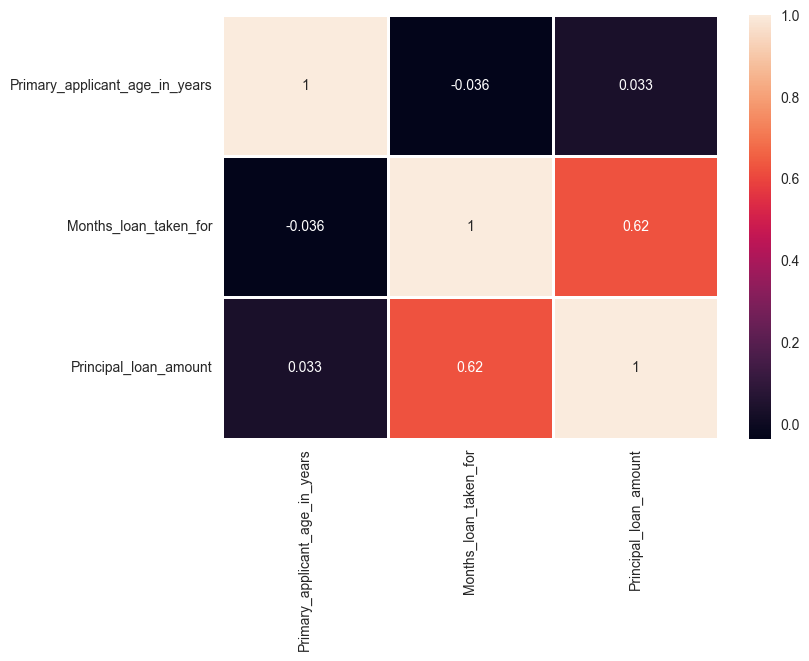

In [15]:
sns.heatmap(data.select_dtypes(include = "number", exclude = "object").corr(), annot = True, linewidths = 1)
#plt.tight_layout()
plt.show()

If :-
- value > 0.85 it is highly correlated.
- value is Between 0.40 and 0.85, it is moderately correlated.
- value < 0.40, it is weakly correlated.


From above heatmap we can conclude that :-
- positive and moderate Correlation between Principal loan amount and Months loan taken for.
- Negative & Weak correlation between Months loan taken for and Primary applicants age.
- Weak correlation between Principal loan amount and Primary applicant age.

Creating dist plot for checking the distribution of numerice datatype:-

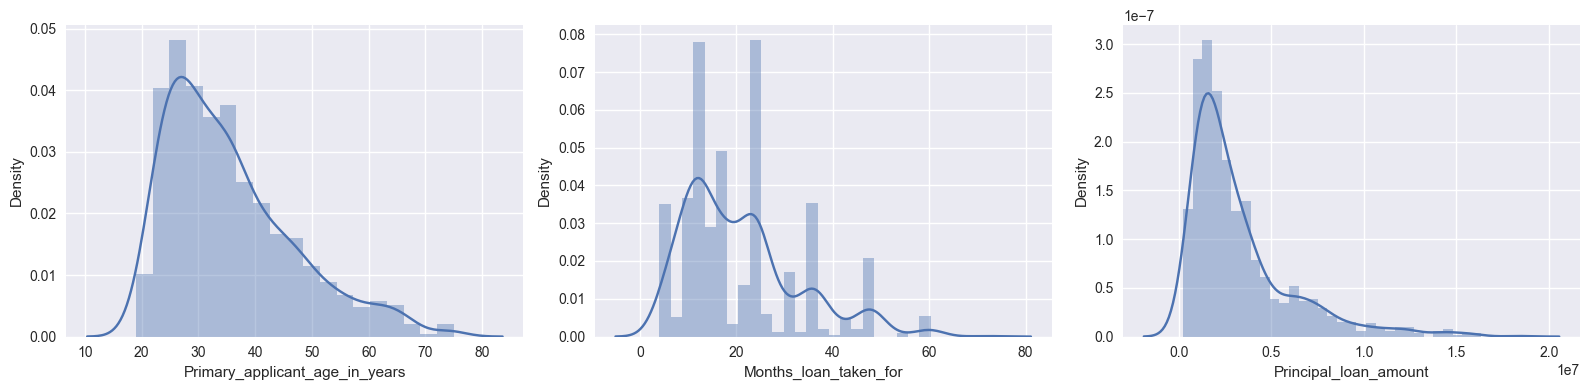

In [16]:
plt.figure(figsize = (16,4))

for i,j in enumerate(data.select_dtypes(include = "number", exclude = "object").columns):

    plt.subplot(1,3,i+1)

    sns.distplot(data[j])
    plt.xlabel("{}".format(j))

    plt.tight_layout()

plt.subplots_adjust()
plt.show()


From the above distplot, we can say that :-
- All the columns are not normal and are left-skewed
- There is multiple cluster in Months_loan_taken_for

Boxplot :- It is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.

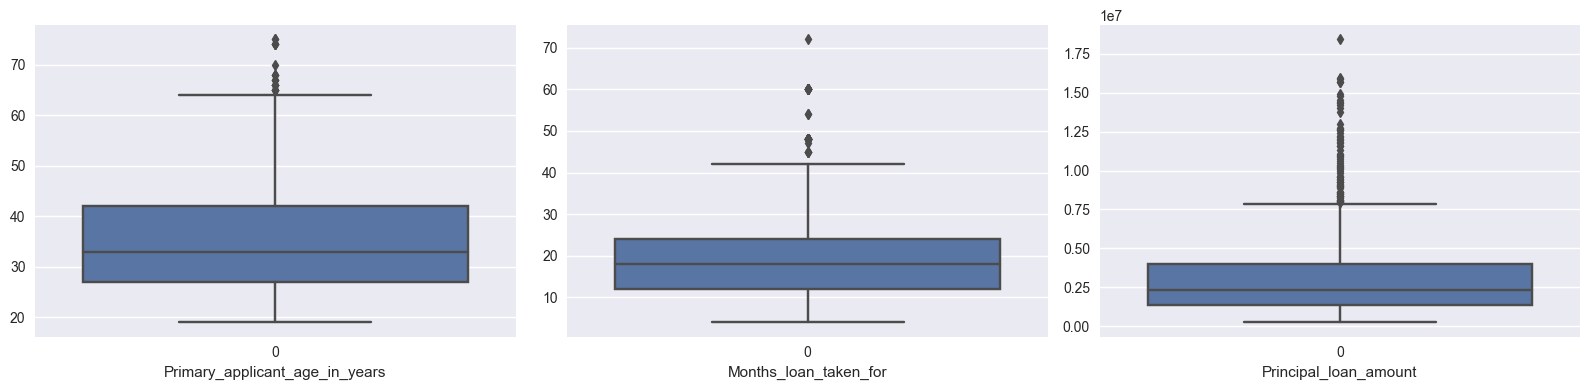

In [17]:
plt.figure(figsize = (16,4))

for i,j in enumerate(data.select_dtypes(include = "number", exclude = "object").columns):

    plt.subplot(1,3,i+1)

    sns.boxplot(data[j])
    plt.xlabel("{}".format(j))

    plt.tight_layout()

plt.subplots_adjust()
plt.show()

There are outliers present in upper whisker. And data are skewed and also not foloowing normal distribution.

Probplot : For checking the normality of the data. It creates a normal probability plot comparing the distribution of the data in y to the normal distribution.

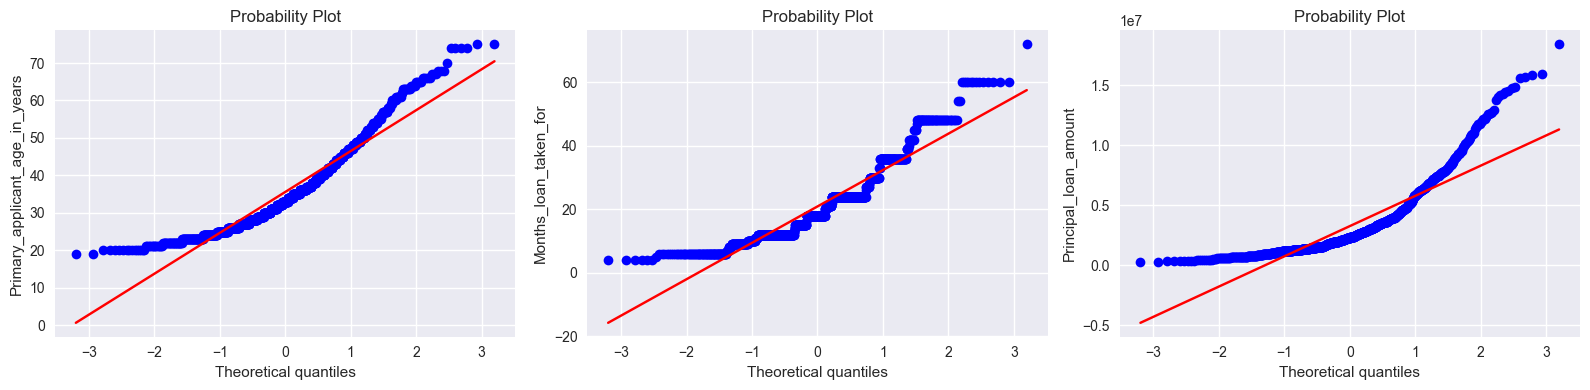

In [18]:
from scipy import stats
plt.figure(figsize = (16,4))

for i,j in enumerate(data.select_dtypes(include = "number", exclude = "object").columns):

    plt.subplot(1,3,i+1)

    stats.probplot(data[j], dist = "norm", plot = plt)
    plt.ylabel("{}".format(j))

    plt.tight_layout()

plt.subplots_adjust()
plt.show()

We can see that data are not normally distributed. It is following exponential trend

Winsorization :- 

It is the process of replacing the extreme values of statistical data in order to limit the effect of the outliers on the calculations or the results obtained by using that data. The mean value calculated after such replacement of the extreme values is called winsorized mean.



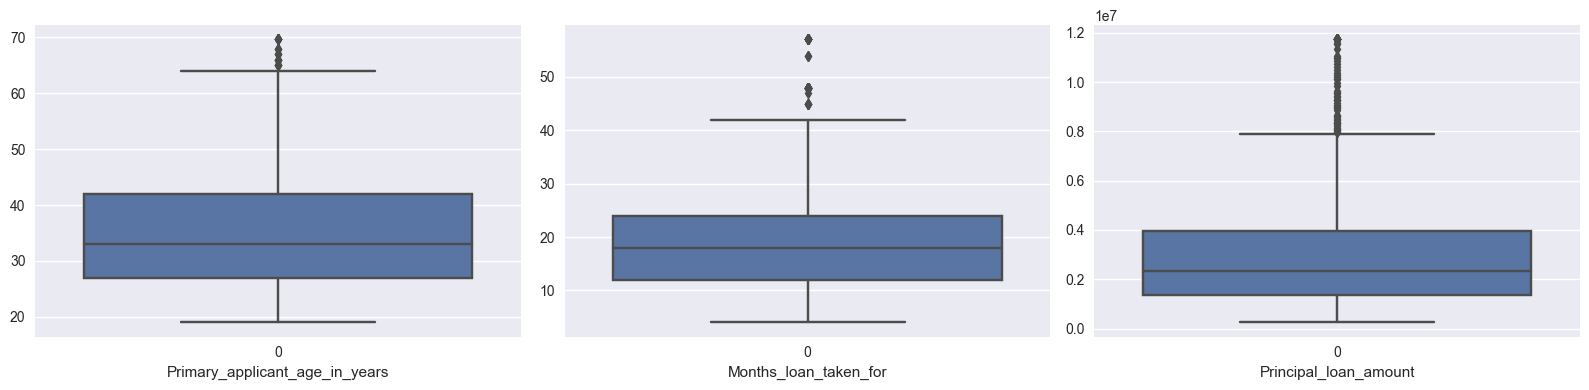

In [19]:
# Performing winsorization using gaussian limits and 3*std_dev
from feature_engine.outliers import Winsorizer

def outliers_treatment(i):
    winsor = Winsorizer(capping_method = "gaussian",
                        fold = 3,
                        tail = "both",
                        variables = [i])

    data[i] = winsor.fit_transform(data[[i]])
    return data[i]

for i in data.select_dtypes(include = "number", exclude = "object").columns:
    outliers_treatment(i)

#########################################################################################################################


# plotting boxplot after performing winsorization

plt.figure(figsize = (16,4))

for i,j in enumerate(data.select_dtypes(include = "number", exclude = "object").columns):

    plt.subplot(1,3,i+1)

    sns.boxplot(data[j])
    plt.xlabel("{}".format(j))

    plt.tight_layout()

plt.subplots_adjust()
plt.show()


Transforming the non-normal data to normal using johnnson technique

In [20]:
def transformation(i):
    fitted_value, fitted_lambda = stats.yeojohnson(data[i])

    data[i] = fitted_value
    return data[i]

for i in data.select_dtypes(include = "number", exclude = "object").columns:
    transformation(i)

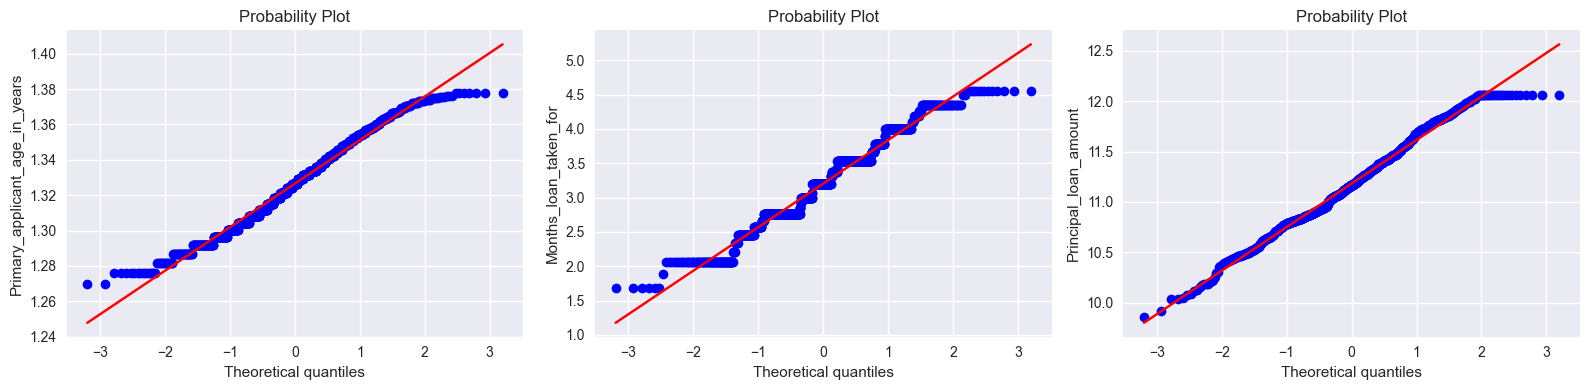

In [21]:
# plotting the probplot after perforeming transformation
from scipy import stats
plt.figure(figsize = (16,4))

for i,j in enumerate(data.select_dtypes(include = "number", exclude = "object").columns):

    plt.subplot(1,3,i+1)

    stats.probplot(data[j], dist = "norm", plot = plt)
    plt.ylabel("{}".format(j))

    plt.tight_layout()

plt.subplots_adjust()
plt.show()

Here, we can see that data are now normally distributed. 

### Feature Scaling

Performing standard scaler to transforms the features in dataset so they have a mean of zero and a variance of one. This will make it easier to linearly compare features. Also, this is a requirement for many models.

In [22]:
from sklearn.preprocessing import StandardScaler #For making data scale free
data["Primary_applicant_age_in_years"] = StandardScaler().fit_transform(data[["Primary_applicant_age_in_years"]])
data["Months_loan_taken_for"] = StandardScaler().fit_transform(data[["Months_loan_taken_for"]])
data["Principal_loan_amount"] = StandardScaler().fit_transform(data[["Principal_loan_amount"]])

In [23]:
# For transforming object data into numeric data 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def label_encoding(i):
    data[i] = LabelEncoder().fit_transform(data[i])
    return data[i]

for i in data.select_dtypes(include = "object").iloc[:,:-1].columns:
    label_encoding(i)

data

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1.977314,1,3,0,1,3,1,3,2,1,...,-1.793082,5,-0.938098,3,2,0,0,1,1,Low Risk
1,-1.605837,0,1,0,1,1,1,1,2,1,...,1.781807,5,1.175856,1,2,0,0,0,3,High Risk
2,1.215169,1,3,1,1,2,3,2,3,1,...,-0.697640,4,-0.164202,1,2,0,0,0,1,Low Risk
3,0.979207,1,3,1,0,3,1,2,3,1,...,1.529498,0,1.527525,1,0,0,1,0,3,Low Risk
4,1.421287,1,3,1,0,3,1,1,2,1,...,0.501379,6,0.922633,2,1,0,0,1,2,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.220852,0,1,0,1,3,3,2,3,1,...,-0.697640,0,-0.412056,2,2,0,0,0,3,Low Risk
996,0.630559,1,0,0,1,3,0,1,2,1,...,0.905461,8,0.625558,3,0,0,0,0,3,Low Risk
997,0.470226,1,3,0,1,3,1,3,2,1,...,-0.697640,5,-1.443546,3,1,0,0,0,3,Low Risk
998,-1.409225,1,3,0,0,3,1,1,2,1,...,1.659540,5,-0.331765,3,1,0,0,0,3,High Risk


### Splitting Datasets

It is important to create a separate evaluation split of a dataset when performing model tuning in supervised learning.
We randomly separate the dataset into two parts: train data and test data. We use the train split for actual training and the test split to measure the model performance.

In [24]:
col = list(data.columns)

predictor = col[:-1] #selecting predictor columns
target = col[-1] # selecting target columns

display(predictor, target)

['Primary_applicant_age_in_years',
 'Gender',
 'Marital_status',
 'Number_of_dependents',
 'Housing',
 'Years_at_current_residence',
 'Employment_status',
 'Has_been_employed_for_at_least',
 'Has_been_employed_for_at_most',
 'Foreign_worker',
 'Savings_account_balance',
 'Months_loan_taken_for',
 'Purpose',
 'Principal_loan_amount',
 'EMI_rate_in_percentage_of_disposable_income',
 'Property',
 'Has_coapplicant',
 'Has_guarantor',
 'Number_of_existing_loans_at_this_bank',
 'Loan_history']

'high_risk_applicant'

In [25]:
# Splitting datasets into train and test
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.2, random_state = 0, stratify = data[target])

display(train, test)

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
355,-1.409225,1,3,0,1,1,3,0,1,1,...,0.501379,6,-0.852690,3,2,0,0,0,3,High Risk
661,-1.409225,1,2,0,1,1,1,1,2,1,...,-0.697640,6,-1.290455,3,1,0,0,0,3,High Risk
300,1.468842,0,1,0,1,3,2,1,0,1,...,-1.793082,6,-1.688345,0,2,0,0,0,3,Low Risk
916,-0.107093,1,3,1,1,1,1,1,2,1,...,-0.996994,8,0.235167,0,2,1,0,0,3,Low Risk
294,1.041367,1,0,1,1,1,0,3,2,1,...,1.781807,1,1.486896,3,1,0,0,1,1,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,-1.054670,0,1,0,1,3,3,0,1,1,...,0.501379,6,-0.740729,2,1,0,0,0,3,High Risk
778,0.470226,1,3,0,1,1,0,3,2,1,...,1.241476,8,1.124018,3,1,0,0,1,1,Low Risk
172,0.103852,0,1,0,1,1,0,1,0,1,...,0.501379,0,-0.184369,2,0,0,0,0,2,High Risk
739,-0.894141,0,1,0,2,3,3,1,2,1,...,0.905461,1,0.758456,3,1,0,0,1,4,High Risk


,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
40,-0.340772,1,3,0,1,1,0,3,2,1,...,0.905461,5,-0.024117,3,1,0,0,0,3,Low Risk
383,-0.894141,1,3,0,1,0,1,0,1,1,...,-0.697640,6,-0.765559,3,2,0,0,0,3,Low Risk
986,0.000996,1,0,0,1,0,1,0,1,1,...,1.529498,1,1.245290,1,0,0,0,1,4,Low Risk
79,-1.605837,1,2,0,1,0,1,0,1,1,...,0.905461,0,0.617235,1,0,0,0,0,3,Low Risk
775,-1.054670,0,1,0,2,3,1,1,2,1,...,0.501379,6,-0.725086,3,2,0,0,0,3,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,0.103852,1,3,1,1,0,3,1,2,1,...,-0.007152,0,0.242420,1,2,0,0,0,3,High Risk
183,1.269250,1,3,0,1,3,1,1,2,1,...,0.501379,0,0.598725,3,2,0,0,0,1,Low Risk
977,0.778217,1,3,0,1,1,1,3,2,1,...,-0.007152,1,0.027391,3,0,0,0,1,2,Low Risk
224,-0.340772,1,3,0,1,1,1,1,2,1,...,-0.321649,8,0.865871,2,1,0,0,0,3,Low Risk


### Model Building

### Black-box Technique

Black boxes are used as a metaphor in machine learning to describe a system that is difficult to explain or interpret. This system normally takes an input does complex calculations/actions then outputs a result. These techniques doesn't give explainability but give good accuracy. 

Applying SVM and Random Forest :

Support vector machines are a set of supervised learning methods used for classification, regression, and outliers detection.

SVMs are different from other classification algorithms because of the way they choose the decision boundary that maximizes the distance from the nearest data points of all the classes. The decision boundary created by SVMs is called the maximum margin classifier or the maximum margin hyper plane.

Random Forest is a popular and effective ensemble machine learning algorithm. We know that a forest comprises of numerous trees, and the more trees more it will be robust. Similarly, the greater the number of trees in a Random Forest Algorithm, the higher its accuracy and problem-solving ability.  Random Forest is a classifier that contains several decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. 

In [26]:
svm_rbf = SVC(kernel = 'rbf', random_state = 0) #Applying SVM with rbf kernel as hyperparameter
svm_linear = SVC(kernel = 'linear', random_state = 0) #Applying SVM with linear kernel as hyperparameter
svm_poly = SVC(kernel = "poly", random_state = 0) #Applying SVM with poly kernel as hyperparameter
RF = RandomForestClassifier(random_state = 0) #Applying RandomForestClassifier

model_list = [svm_rbf, svm_linear, svm_poly, RF] 
model_list


[SVC(random_state=0),
 SVC(kernel='linear', random_state=0),
 SVC(kernel='poly', random_state=0),
 RandomForestClassifier(random_state=0)]

Checking the accuracy and confusion matrix of all the black box technique at once by creating a pipeline.

In [27]:


for model in model_list:

    print("{}".format(model))
    model.fit(train[predictor], train[target])

    print("For Test: ")
    test_pred = model.predict(test[predictor])
    display(pd.crosstab(test[target], test_pred, rownames = ["Actual"], colnames = ["Prediction"]))
    print("Accuracy: ", accuracy_score(test[target], test_pred))

    print("..............................................................")

    print("For Train: ")
    train_pred = model.predict(train[predictor])
    display(pd.crosstab(train[target], train_pred, rownames = ["Actual"], colnames = ["Prediction"]))
    print("Accuracy: ", accuracy_score(train[target], train_pred))

    print("-----------------------------------------------------------------------------------------------------------------------")
    print("-----------------------------------------------------------------------------------------------------------------------")




SVC(random_state=0)
For Test: 


Prediction,High Risk,Low Risk
Actual,,
High Risk,1,59
Low Risk,1,139


Accuracy:  0.7
..............................................................
For Train: 


Prediction,High Risk,Low Risk
Actual,,
High Risk,17,223
Low Risk,3,557


Accuracy:  0.7175
-----------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------
SVC(kernel='linear', random_state=0)
For Test: 


Prediction,Low Risk
Actual,
High Risk,60
Low Risk,140


Accuracy:  0.7
..............................................................
For Train: 


Prediction,Low Risk
Actual,
High Risk,240
Low Risk,560


Accuracy:  0.7
-----------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------
SVC(kernel='poly', random_state=0)
For Test: 


Prediction,High Risk,Low Risk
Actual,,
High Risk,6,54
Low Risk,1,139


Accuracy:  0.725
..............................................................
For Train: 


Prediction,High Risk,Low Risk
Actual,,
High Risk,48,192
Low Risk,11,549


Accuracy:  0.74625
-----------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------
RandomForestClassifier(random_state=0)
For Test: 


Prediction,High Risk,Low Risk
Actual,,
High Risk,21,39
Low Risk,9,131


Accuracy:  0.76
..............................................................
For Train: 


Prediction,High Risk,Low Risk
Actual,,
High Risk,240,0
Low Risk,0,560


Accuracy:  1.0
-----------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------


After getting the output from the above model we can clearly see that :-

- Support Vector is giving accuracy of 70% of test data and 71% of train data. It is also giving biased output in confusion matrix.
- SVC with kernel ="linear" is giving accuracy 70% for both train and test data and also is completely biased. 
- SVC with kernel as poly is giving accuracy of 72% for test data and 74% for train data. But, in cofusion matrix we can clearly see that it is missclassifying 54 applicants as low risk but actually they are high risk applicants.
- RandomForest classifier is completely overfitting. so, we can't use this model also.

From above insights, we can see that none of the above model is giving good accuracy.

So, we have to try some other ML algorithms.

###  Model

For the loan datasets, we need explainability. Like, if customers comeback asking for why their loan got rejected then we can easily show the reason behind the rejection.

That's why we are going to use KNN, DecisionTree, Naive Bayes and Logistic Regression.

 KNN : K-Nearest Neighbors is a supervised machine learning technique and algorithm that can be used for both regression and classification tasks. K-Nearest Neighbors examines the labels of a chosen number of data points surrounding a target data point, in order to make a prediction about the class that the data point falls into.

Decision Tree : It is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

Naive Bayes  : It is a probabilistic machine learning algorithm that can be used in a wide variety of classification tasks.

In [28]:
knn = KNeighborsClassifier(n_jobs = -1, n_neighbors = 15) #Importing KNN
DT = DecisionTreeClassifier(random_state = 0) # Importing DecisionTreeClassifier
naive_ber = BernoulliNB() #Importing Bernoulli Naive Bayes

In [29]:
model_list = [knn, DT, naive_ber]
model_list

[KNeighborsClassifier(n_jobs=-1, n_neighbors=15),
 DecisionTreeClassifier(random_state=0),
 BernoulliNB()]

Building a pipeline for checking the accuracy and crosstable for all three ML algorithms at once.

In [30]:
for model in model_list:

    print("{}".format(model))
    model.fit(train[predictor], train[target])

    print("For Test: ")
    test_pred = model.predict(test[predictor])
    display(pd.crosstab(test[target], test_pred, rownames = ["Actual"], colnames = ["Prediction"]))
    print("Accuracy: ", accuracy_score(test[target], test_pred))

    print("..............................................................")

    print("For Train: ")
    train_pred = model.predict(train[predictor])
    display(pd.crosstab(train[target], train_pred, rownames = ["Actual"], colnames = ["Prediction"]))
    print("Accuracy: ", accuracy_score(train[target], train_pred))

    print("-----------------------------------------------------------------------------------------------------------------------")
    print("-----------------------------------------------------------------------------------------------------------------------")


    

KNeighborsClassifier(n_jobs=-1, n_neighbors=15)
For Test: 


Prediction,High Risk,Low Risk
Actual,,
High Risk,14,46
Low Risk,7,133


Accuracy:  0.735
..............................................................
For Train: 


Prediction,High Risk,Low Risk
Actual,,
High Risk,34,206
Low Risk,17,543


Accuracy:  0.72125
-----------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(random_state=0)
For Test: 


Prediction,High Risk,Low Risk
Actual,,
High Risk,27,33
Low Risk,36,104


Accuracy:  0.655
..............................................................
For Train: 


Prediction,High Risk,Low Risk
Actual,,
High Risk,240,0
Low Risk,0,560


Accuracy:  1.0
-----------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------
BernoulliNB()
For Test: 


Prediction,High Risk,Low Risk
Actual,,
High Risk,12,48
Low Risk,12,128


Accuracy:  0.7
..............................................................
For Train: 


Prediction,High Risk,Low Risk
Actual,,
High Risk,38,202
Low Risk,36,524


Accuracy:  0.7025
-----------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------


From above output we can drew insights like :-

- KNN is giving test accuracy 73% and for train 72%.
- DecisionTree is overfitting on the model. It is giving 65% accuracy for test data and 100% accuracy for train data.
- Bernoulli Naive Bayes is giving 70% accuracy on both train and test.


Finally, we can conclude that none of the model is not giving good accuracy and they are also misclassifying High Risk applicants as Low Risk, which will result in the loss of the bank.

Let's try some hyperparameter tuning of DecisionTree using RandomizedSearchCV for getting better accuracy.

Random search tries random combinations of a range of values by specifying number of iterations. It is good at testing a wide range of values and normally it reaches a very good combination very fast.

In [31]:
# Selecting parameters for hyperparameter tuning.
param = {"criterion":["gini", "entropy", "log_loss"], 
        "splitter":["best", "random"], 
        "max_depth":list(range(1,50)), 
        "min_samples_split":list(range(2,50)), 
        "min_samples_leaf":list(range(1,50)),
        "max_features":["auto", "sqrt", "log2"], 
        "max_leaf_nodes":list(range(1,50))}

Fitting param on RandomizedSearchCV

In [32]:
model_RS = RandomizedSearchCV(estimator = DecisionTreeClassifier(random_state = 0),
                                param_distributions = param,
                                n_jobs = -1,
                                random_state = 0,
                                cv = 5,
                                scoring = "accuracy",
                                ).fit(train[predictor], train[target])
model_RS

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, ...],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30, ...],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19, 20,
                                                              21, 22, 23, 24,
                                                              25, 26, 27, 28,
                                                              29, 30, 31, ...],
                                        'splitter': ['best', 'random']},
                   random_state=0, scoring='accuracy')

In [33]:
model_RS.best_score_

0.70875

Model giving 70% as best score

In [34]:
model_RS.best_params_

{'splitter': 'random',
 'min_samples_split': 15,
 'min_samples_leaf': 13,
 'max_leaf_nodes': 26,
 'max_features': 'auto',
 'max_depth': 40,
 'criterion': 'entropy'}

These are the best parameters which will give good accuracy.

Fitting best estimators on the model for prediction

In [35]:
model = model_RS.best_estimator_
model

DecisionTreeClassifier(criterion='entropy', max_depth=40, max_features='auto',
                       max_leaf_nodes=26, min_samples_leaf=13,
                       min_samples_split=15, random_state=0, splitter='random')

CHecking the accuracy for test and train data, after peforming hyperparameter tuning.

In [36]:
print("For Test: ")
test_pred = model.predict(test[predictor])
display(pd.crosstab(test[target], test_pred, rownames = ["Actual"], colnames = ["Prediction"]))
print("Accuracy: ", accuracy_score(test[target], test_pred))

print("..............................................................")

print("For Train: ")
train_pred = model.predict(train[predictor])
display(pd.crosstab(train[target], train_pred, rownames = ["Actual"], colnames = ["Prediction"]))
print("Accuracy: ", accuracy_score(train[target], train_pred))

For Test: 


Prediction,High Risk,Low Risk
Actual,,
High Risk,8,52
Low Risk,2,138


Accuracy:  0.73
..............................................................
For Train: 


Prediction,High Risk,Low Risk
Actual,,
High Risk,44,196
Low Risk,20,540


Accuracy:  0.73


After hyperparameter tuning, We are getiing 73% accuracy for both test and train data. But, Still getting too much misclassification.

Let's try Logistic Regression:-

Logit model is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as Default or Not Default, based on a given dataset of independent variables. 


Some of the assumptions of Logistic Regression are :- 
- The dependent variable is binary
- There should be no, or very little, multicollinearity between the predictor variables
- The independent variables should be linearly related to the log odds
- Logistic regression requires fairly large sample sizes

In [37]:
# Applying Logistic Regression on train data
model = LogisticRegression(random_state = 0, n_jobs = -1).fit(train[predictor], train[target])
model

LogisticRegression(n_jobs=-1, random_state=0)

Checking accuracy and confusion matrix for train and test data

In [38]:
print("For Test: ")
test_pred = model.predict(test[predictor])
display(pd.crosstab(test[target], test_pred, rownames = ["Actual"], colnames = ["Prediction"]))
print("Accuracy: ", accuracy_score(test[target], test_pred))

print("..............................................................")

print("For Train: ")
train_pred = model.predict(train[predictor])
display(pd.crosstab(train[target], train_pred, rownames = ["Actual"], colnames = ["Prediction"]))
print("Accuracy: ", accuracy_score(train[target], train_pred))

For Test: 


Prediction,High Risk,Low Risk
Actual,,
High Risk,9,51
Low Risk,6,134


Accuracy:  0.715
..............................................................
For Train: 


Prediction,High Risk,Low Risk
Actual,,
High Risk,47,193
Low Risk,24,536


Accuracy:  0.72875


Here, for test data we are getting accuracy 71% and for train, we are getting accuracy of 72%. Still misclassifying data. Let's do some more experiments like droppinf the irrevelant columns. 

Typecasting the target column and converting the target columns value in 0 and 1 format.

In [39]:
train["high_risk_applicant"] = np.where(train["high_risk_applicant"] == "Low Risk", 0, train["high_risk_applicant"])
train["high_risk_applicant"] = np.where(train["high_risk_applicant"] == "High Risk", 1, train["high_risk_applicant"])
train

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
355,-1.409225,1,3,0,1,1,3,0,1,1,...,0.501379,6,-0.852690,3,2,0,0,0,3,1
661,-1.409225,1,2,0,1,1,1,1,2,1,...,-0.697640,6,-1.290455,3,1,0,0,0,3,1
300,1.468842,0,1,0,1,3,2,1,0,1,...,-1.793082,6,-1.688345,0,2,0,0,0,3,0
916,-0.107093,1,3,1,1,1,1,1,2,1,...,-0.996994,8,0.235167,0,2,1,0,0,3,0
294,1.041367,1,0,1,1,1,0,3,2,1,...,1.781807,1,1.486896,3,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,-1.054670,0,1,0,1,3,3,0,1,1,...,0.501379,6,-0.740729,2,1,0,0,0,3,1
778,0.470226,1,3,0,1,1,0,3,2,1,...,1.241476,8,1.124018,3,1,0,0,1,1,0
172,0.103852,0,1,0,1,1,0,1,0,1,...,0.501379,0,-0.184369,2,0,0,0,0,2,1
739,-0.894141,0,1,0,2,3,3,1,2,1,...,0.905461,1,0.758456,3,1,0,0,1,4,1


Logistic Model from Statsmodels

Statsmodels provides a Logit() function for performing logistic regression. The Logit() function accepts y and X as parameters and returns the Logit object. The model is then fitted to the data.

In [40]:
# Converting target columns to integer type
train["high_risk_applicant"] = train["high_risk_applicant"].astype(int)

In [41]:
test["high_risk_applicant"] = np.where(test["high_risk_applicant"] == "Low Risk", 0, test["high_risk_applicant"])
test["high_risk_applicant"] = np.where(test["high_risk_applicant"] == "High Risk", 1, test["high_risk_applicant"])
test["high_risk_applicant"] = test["high_risk_applicant"].astype(int)

In [42]:
import statsmodels.formula.api as smf

model = smf.logit("high_risk_applicant ~ Primary_applicant_age_in_years + Gender + Marital_status + Number_of_dependents + Housing + Years_at_current_residence + Employment_status + Has_been_employed_for_at_least + Has_been_employed_for_at_most + Foreign_worker + Savings_account_balance + Months_loan_taken_for + Purpose + Principal_loan_amount + EMI_rate_in_percentage_of_disposable_income + Property + Has_coapplicant + Has_guarantor + Number_of_existing_loans_at_this_bank + Loan_history", data = train).fit()
print(model.summary2())
display(model.summary())

Optimization terminated successfully.
         Current function value: 0.562595
         Iterations 6
                                      Results: Logit
Model:                       Logit                      Pseudo R-squared:        0.079     
Dependent Variable:          high_risk_applicant        AIC:                     942.1515  
Date:                        2022-11-18 14:41           BIC:                     1040.5284 
No. Observations:            800                        Log-Likelihood:          -450.08   
Df Model:                    20                         LL-Null:                 -488.69   
Df Residuals:                779                        LLR p-value:             1.1526e-08
Converged:                   1.0000                     Scale:                   1.0000    
No. Iterations:              6.0000                                                        
-------------------------------------------------------------------------------------------
                 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     high_risk_applicant   No. Observations:                  800
Model:                           Logit   Df Residuals:                      779
Method:                            MLE   Df Model:                           20
Date:                 Fri, 18 Nov 2022   Pseudo R-squ.:                 0.07902
Time:                         14:41:04   Log-Likelihood:                -450.08
converged:                        True   LL-Null:                       -488.69
Covariance Type:             nonrobust   LLR p-value:                 1.153e-08
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -1.4999      0.824     -1.820      0.069      -3.116       0.116
Primary_applicant_age_in_years                 -0.1569      0.098     -1.607      0.108      -0.348       0.034
Gender                                          0.1560      0.268      0.583      0.560      -0.368       0.680
Marital_status                                 -0.2373      0.126     -1.883      0.060      -0.484       0.010
Number_of_dependents                            0.3228      0.249      1.299      0.194      -0.164       0.810
Housing                                         0.0773      0.169      0.457      0.647      -0.254       0.408
Years_at_current_residence                      0.0360      0.079      0.456      0.649      -0.119       0.191
Employment_status                               0.0629      0.095      0.666      0.506      -0.122       0.248
Has_been_employed_for_at_least                 -0.0380      0.107     -0.354      0.724      -0.249       0.173
Has_been_employed_for_at_most                  -0.2750      0.131     -2.096      0.036      -0.532      -0.018
Foreign_worker                                  0.9480      0.655      1.448      0.148      -0.335       2.231
Savings_account_balance                        -0.0540      0.141     -0.383      0.701      -0.330       0.222
Months_loan_taken_for                           0.4896      0.124      3.935      0.000       0.246       0.733
Purpose                                        -0.0308      0.031     -0.993      0.321      -0.092       0.030
Principal_loan_amount                           0.0171      0.130      0.131      0.896      -0.238       0.272
EMI_rate_in_percentage_of_disposable_income     0.1133      0.087      1.296      0.195      -0.058       0.285
Property                                       -0.1246      0.118     -1.054      0.292      -0.356       0.107
Has_coapplicant                                 0.6277      0.378      1.661      0.097      -0.113       1.368
Has_guarantor                                  -0.4920      0.416     -1.182      0.237      -1.308       0.324
Number_of_existing_loans_at_this_bank           0.0422      0.156      0.270      0.787      -0.264       0.348
Loan_history                                    0.1824      0.084      2.174      0.030       0.018       0.347
===============================================================================================================
"""

From above summary we can see that p value of "Principal_loan_amount" is greater than 0.05 and greater than all of the other features. So, we are dropping that column.

In [43]:
#Fitting smf.logit() on the model. 
import statsmodels.formula.api as smf

model = smf.logit("high_risk_applicant ~ Primary_applicant_age_in_years + Gender + Marital_status + Number_of_dependents + Housing + Years_at_current_residence + Employment_status + Has_been_employed_for_at_least + Has_been_employed_for_at_most + Foreign_worker + Savings_account_balance + Months_loan_taken_for + Purpose + EMI_rate_in_percentage_of_disposable_income + Property + Has_coapplicant + Has_guarantor + Number_of_existing_loans_at_this_bank + Loan_history", data = train).fit()
print(model.summary2())
display(model.summary())

Optimization terminated successfully.
         Current function value: 0.562605
         Iterations 6
                                      Results: Logit
Model:                       Logit                      Pseudo R-squared:        0.079     
Dependent Variable:          high_risk_applicant        AIC:                     940.1686  
Date:                        2022-11-18 14:41           BIC:                     1033.8609 
No. Observations:            800                        Log-Likelihood:          -450.08   
Df Model:                    19                         LL-Null:                 -488.69   
Df Residuals:                780                        LLR p-value:             5.5904e-09
Converged:                   1.0000                     Scale:                   1.0000    
No. Iterations:              6.0000                                                        
-------------------------------------------------------------------------------------------
                 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     high_risk_applicant   No. Observations:                  800
Model:                           Logit   Df Residuals:                      780
Method:                            MLE   Df Model:                           19
Date:                 Fri, 18 Nov 2022   Pseudo R-squ.:                 0.07900
Time:                         14:41:04   Log-Likelihood:                -450.08
converged:                        True   LL-Null:                       -488.69
Covariance Type:             nonrobust   LLR p-value:                 5.590e-09
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -1.4863      0.818     -1.817      0.069      -3.089       0.117
Primary_applicant_age_in_years                 -0.1559      0.097     -1.602      0.109      -0.347       0.035
Gender                                          0.1564      0.268      0.584      0.559      -0.368       0.681
Marital_status                                 -0.2357      0.125     -1.879      0.060      -0.482       0.010
Number_of_dependents                            0.3231      0.249      1.300      0.194      -0.164       0.810
Housing                                         0.0769      0.169      0.455      0.649      -0.254       0.408
Years_at_current_residence                      0.0361      0.079      0.457      0.648      -0.119       0.191
Employment_status                               0.0603      0.092      0.653      0.514      -0.121       0.242
Has_been_employed_for_at_least                 -0.0386      0.107     -0.360      0.719      -0.249       0.172
Has_been_employed_for_at_most                  -0.2751      0.131     -2.096      0.036      -0.532      -0.018
Foreign_worker                                  0.9473      0.655      1.447      0.148      -0.336       2.230
Savings_account_balance                        -0.0539      0.141     -0.383      0.702      -0.330       0.222
Months_loan_taken_for                           0.5007      0.091      5.484      0.000       0.322       0.680
Purpose                                        -0.0308      0.031     -0.992      0.321      -0.092       0.030
EMI_rate_in_percentage_of_disposable_income     0.1075      0.075      1.428      0.153      -0.040       0.255
Property                                       -0.1256      0.118     -1.065      0.287      -0.357       0.105
Has_coapplicant                                 0.6310      0.377      1.673      0.094      -0.108       1.370
Has_guarantor                                  -0.4937      0.416     -1.187      0.235      -1.309       0.322
Number_of_existing_loans_at_this_bank           0.0426      0.156      0.273      0.785      -0.263       0.348
Loan_history                                    0.1824      0.084      2.174      0.030       0.018       0.347
===============================================================================================================
"""

From above summary we can see that p value of "Number_of_existing_loans_at_this_bank" is greater than 0.05 and greater than all of the other features. So, we are dropping that column.

In [44]:
import statsmodels.formula.api as smf

model = smf.logit("high_risk_applicant ~ Primary_applicant_age_in_years + Gender + Marital_status + Number_of_dependents + Housing + Years_at_current_residence + Employment_status + Has_been_employed_for_at_least + Has_been_employed_for_at_most + Foreign_worker + Savings_account_balance + Months_loan_taken_for + Purpose + EMI_rate_in_percentage_of_disposable_income + Property + Has_coapplicant + Has_guarantor + Loan_history", data = train).fit()
print(model.summary2())
display(model.summary())

Optimization terminated successfully.
         Current function value: 0.562652
         Iterations 6
                                      Results: Logit
Model:                       Logit                      Pseudo R-squared:        0.079     
Dependent Variable:          high_risk_applicant        AIC:                     938.2432  
Date:                        2022-11-18 14:41           BIC:                     1027.2508 
No. Observations:            800                        Log-Likelihood:          -450.12   
Df Model:                    18                         LL-Null:                 -488.69   
Df Residuals:                781                        LLR p-value:             2.6997e-09
Converged:                   1.0000                     Scale:                   1.0000    
No. Iterations:              6.0000                                                        
-------------------------------------------------------------------------------------------
                 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     high_risk_applicant   No. Observations:                  800
Model:                           Logit   Df Residuals:                      781
Method:                            MLE   Df Model:                           18
Date:                 Fri, 18 Nov 2022   Pseudo R-squ.:                 0.07892
Time:                         14:41:04   Log-Likelihood:                -450.12
converged:                        True   LL-Null:                       -488.69
Covariance Type:             nonrobust   LLR p-value:                 2.700e-09
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -1.4645      0.814     -1.800      0.072      -3.059       0.130
Primary_applicant_age_in_years                 -0.1540      0.097     -1.588      0.112      -0.344       0.036
Gender                                          0.1585      0.267      0.593      0.553      -0.366       0.683
Marital_status                                 -0.2348      0.125     -1.873      0.061      -0.481       0.011
Number_of_dependents                            0.3263      0.248      1.315      0.189      -0.160       0.813
Housing                                         0.0796      0.169      0.472      0.637      -0.251       0.410
Years_at_current_residence                      0.0371      0.079      0.470      0.639      -0.118       0.192
Employment_status                               0.0607      0.092      0.657      0.511      -0.120       0.242
Has_been_employed_for_at_least                 -0.0368      0.107     -0.344      0.731      -0.247       0.173
Has_been_employed_for_at_most                  -0.2768      0.131     -2.112      0.035      -0.534      -0.020
Foreign_worker                                  0.9515      0.654      1.454      0.146      -0.331       2.234
Savings_account_balance                        -0.0511      0.140     -0.364      0.716      -0.326       0.224
Months_loan_taken_for                           0.5013      0.091      5.495      0.000       0.322       0.680
Purpose                                        -0.0311      0.031     -1.002      0.317      -0.092       0.030
EMI_rate_in_percentage_of_disposable_income     0.1066      0.075      1.417      0.156      -0.041       0.254
Property                                       -0.1257      0.118     -1.066      0.287      -0.357       0.105
Has_coapplicant                                 0.6267      0.377      1.663      0.096      -0.112       1.365
Has_guarantor                                  -0.4952      0.416     -1.190      0.234      -1.310       0.320
Loan_history                                    0.1749      0.079      2.209      0.027       0.020       0.330
===============================================================================================================
"""

From above summary we can see that p value of "Savings_account_balance" is greater than 0.05 and greater than all of the other features. So, we are dropping that column.

In [45]:
import statsmodels.formula.api as smf

model = smf.logit("high_risk_applicant ~ Primary_applicant_age_in_years + Gender + Marital_status + Number_of_dependents + Housing + Years_at_current_residence + Employment_status + Has_been_employed_for_at_least + Has_been_employed_for_at_most + Foreign_worker + Months_loan_taken_for + Purpose + EMI_rate_in_percentage_of_disposable_income + Property + Has_coapplicant + Has_guarantor + Loan_history", data = train).fit()
print(model.summary2())
display(model.summary())

Optimization terminated successfully.
         Current function value: 0.562735
         Iterations 6
                                      Results: Logit
Model:                       Logit                      Pseudo R-squared:        0.079     
Dependent Variable:          high_risk_applicant        AIC:                     936.3766  
Date:                        2022-11-18 14:41           BIC:                     1020.6996 
No. Observations:            800                        Log-Likelihood:          -450.19   
Df Model:                    17                         LL-Null:                 -488.69   
Df Residuals:                782                        LLR p-value:             1.2980e-09
Converged:                   1.0000                     Scale:                   1.0000    
No. Iterations:              6.0000                                                        
-------------------------------------------------------------------------------------------
                 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     high_risk_applicant   No. Observations:                  800
Model:                           Logit   Df Residuals:                      782
Method:                            MLE   Df Model:                           17
Date:                 Fri, 18 Nov 2022   Pseudo R-squ.:                 0.07879
Time:                         14:41:04   Log-Likelihood:                -450.19
converged:                        True   LL-Null:                       -488.69
Covariance Type:             nonrobust   LLR p-value:                 1.298e-09
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -1.5217      0.798     -1.907      0.057      -3.086       0.042
Primary_applicant_age_in_years                 -0.1550      0.097     -1.599      0.110      -0.345       0.035
Gender                                          0.1583      0.267      0.592      0.554      -0.366       0.682
Marital_status                                 -0.2327      0.125     -1.859      0.063      -0.478       0.013
Number_of_dependents                            0.3223      0.248      1.300      0.193      -0.163       0.808
Housing                                         0.0779      0.169      0.462      0.644      -0.252       0.408
Years_at_current_residence                      0.0373      0.079      0.472      0.637      -0.117       0.192
Employment_status                               0.0615      0.092      0.665      0.506      -0.120       0.243
Has_been_employed_for_at_least                 -0.0358      0.107     -0.334      0.738      -0.246       0.174
Has_been_employed_for_at_most                  -0.2799      0.131     -2.139      0.032      -0.536      -0.023
Foreign_worker                                  0.9527      0.654      1.457      0.145      -0.329       2.234
Months_loan_taken_for                           0.5007      0.091      5.490      0.000       0.322       0.679
Purpose                                        -0.0315      0.031     -1.015      0.310      -0.092       0.029
EMI_rate_in_percentage_of_disposable_income     0.1058      0.075      1.407      0.159      -0.042       0.253
Property                                       -0.1260      0.118     -1.069      0.285      -0.357       0.105
Has_coapplicant                                 0.6214      0.377      1.650      0.099      -0.117       1.359
Has_guarantor                                  -0.4886      0.416     -1.176      0.240      -1.303       0.326
Loan_history                                    0.1756      0.079      2.219      0.026       0.020       0.331
===============================================================================================================
"""

From above summary we can see that p value of "Has_been_employed_for_at_least" is greater than 0.05 and greater than all of the other features. So, we are dropping that column.

In [46]:
import statsmodels.formula.api as smf

model = smf.logit("high_risk_applicant ~ Primary_applicant_age_in_years + Gender + Marital_status + Number_of_dependents + Housing + Years_at_current_residence + Employment_status + Has_been_employed_for_at_most + Foreign_worker + Months_loan_taken_for + Purpose + EMI_rate_in_percentage_of_disposable_income + Property + Has_coapplicant + Has_guarantor + Loan_history", data = train).fit()
print(model.summary2())
display(model.summary())

Optimization terminated successfully.
         Current function value: 0.562805
         Iterations 6
                                      Results: Logit
Model:                       Logit                      Pseudo R-squared:        0.079     
Dependent Variable:          high_risk_applicant        AIC:                     934.4884  
Date:                        2022-11-18 14:41           BIC:                     1014.1268 
No. Observations:            800                        Log-Likelihood:          -450.24   
Df Model:                    16                         LL-Null:                 -488.69   
Df Residuals:                783                        LLR p-value:             6.0067e-10
Converged:                   1.0000                     Scale:                   1.0000    
No. Iterations:              6.0000                                                        
-------------------------------------------------------------------------------------------
                 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     high_risk_applicant   No. Observations:                  800
Model:                           Logit   Df Residuals:                      783
Method:                            MLE   Df Model:                           16
Date:                 Fri, 18 Nov 2022   Pseudo R-squ.:                 0.07867
Time:                         14:41:04   Log-Likelihood:                -450.24
converged:                        True   LL-Null:                       -488.69
Covariance Type:             nonrobust   LLR p-value:                 6.007e-10
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -1.5080      0.797     -1.892      0.059      -3.070       0.055
Primary_applicant_age_in_years                 -0.1658      0.092     -1.812      0.070      -0.345       0.014
Gender                                          0.1549      0.267      0.580      0.562      -0.369       0.678
Marital_status                                 -0.2349      0.125     -1.879      0.060      -0.480       0.010
Number_of_dependents                            0.3196      0.248      1.290      0.197      -0.166       0.805
Housing                                         0.0785      0.168      0.466      0.641      -0.252       0.409
Years_at_current_residence                      0.0308      0.076      0.402      0.688      -0.119       0.181
Employment_status                               0.0667      0.091      0.732      0.464      -0.112       0.245
Has_been_employed_for_at_most                  -0.3044      0.108     -2.809      0.005      -0.517      -0.092
Foreign_worker                                  0.9462      0.654      1.447      0.148      -0.335       2.228
Months_loan_taken_for                           0.5007      0.091      5.493      0.000       0.322       0.679
Purpose                                        -0.0321      0.031     -1.039      0.299      -0.093       0.028
EMI_rate_in_percentage_of_disposable_income     0.1046      0.075      1.393      0.164      -0.043       0.252
Property                                       -0.1260      0.118     -1.069      0.285      -0.357       0.105
Has_coapplicant                                 0.6174      0.377      1.640      0.101      -0.121       1.355
Has_guarantor                                  -0.4855      0.415     -1.169      0.242      -1.300       0.329
Loan_history                                    0.1765      0.079      2.232      0.026       0.022       0.332
===============================================================================================================
"""

From above summary we can see that p value of "Housing" is greater than 0.05 and greater than all of the other features. So, we are dropping that column.

In [47]:
import statsmodels.formula.api as smf

model = smf.logit("high_risk_applicant ~ Primary_applicant_age_in_years + Gender + Marital_status + Number_of_dependents + Years_at_current_residence + Employment_status + Has_been_employed_for_at_most + Foreign_worker + Months_loan_taken_for + Purpose + EMI_rate_in_percentage_of_disposable_income + Property + Has_coapplicant + Has_guarantor + Loan_history", data = train).fit()
print(model.summary2())
display(model.summary())

Optimization terminated successfully.
         Current function value: 0.562941
         Iterations 6
                                      Results: Logit
Model:                       Logit                      Pseudo R-squared:        0.078     
Dependent Variable:          high_risk_applicant        AIC:                     932.7053  
Date:                        2022-11-18 14:41           BIC:                     1007.6591 
No. Observations:            800                        Log-Likelihood:          -450.35   
Df Model:                    15                         LL-Null:                 -488.69   
Df Residuals:                784                        LLR p-value:             2.8138e-10
Converged:                   1.0000                     Scale:                   1.0000    
No. Iterations:              6.0000                                                        
-------------------------------------------------------------------------------------------
                 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     high_risk_applicant   No. Observations:                  800
Model:                           Logit   Df Residuals:                      784
Method:                            MLE   Df Model:                           15
Date:                 Fri, 18 Nov 2022   Pseudo R-squ.:                 0.07845
Time:                         14:41:04   Log-Likelihood:                -450.35
converged:                        True   LL-Null:                       -488.69
Covariance Type:             nonrobust   LLR p-value:                 2.814e-10
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -1.4152      0.772     -1.832      0.067      -2.929       0.099
Primary_applicant_age_in_years                 -0.1787      0.087     -2.048      0.041      -0.350      -0.008
Gender                                          0.1507      0.267      0.565      0.572      -0.372       0.674
Marital_status                                 -0.2402      0.124     -1.932      0.053      -0.484       0.004
Number_of_dependents                            0.3113      0.247      1.259      0.208      -0.173       0.796
Years_at_current_residence                      0.0349      0.076      0.460      0.646      -0.114       0.184
Employment_status                               0.0702      0.091      0.773      0.439      -0.108       0.248
Has_been_employed_for_at_most                  -0.3019      0.108     -2.790      0.005      -0.514      -0.090
Foreign_worker                                  0.9407      0.655      1.437      0.151      -0.342       2.224
Months_loan_taken_for                           0.4957      0.090      5.482      0.000       0.318       0.673
Purpose                                        -0.0334      0.031     -1.086      0.278      -0.094       0.027
EMI_rate_in_percentage_of_disposable_income     0.1037      0.075      1.382      0.167      -0.043       0.251
Property                                       -0.1271      0.118     -1.077      0.281      -0.358       0.104
Has_coapplicant                                 0.6225      0.376      1.656      0.098      -0.114       1.359
Has_guarantor                                  -0.4811      0.416     -1.158      0.247      -1.296       0.334
Loan_history                                    0.1783      0.079      2.257      0.024       0.023       0.333
===============================================================================================================
"""

From above summary we can see that p value of "Years_at_current_residence" is greater than 0.05 and greater than all of the other features. So, we are dropping that column.

In [48]:
import statsmodels.formula.api as smf

model = smf.logit("high_risk_applicant ~ Primary_applicant_age_in_years + Gender + Marital_status + Number_of_dependents + Employment_status + Has_been_employed_for_at_most + Foreign_worker + Months_loan_taken_for + Purpose + EMI_rate_in_percentage_of_disposable_income + Property + Has_coapplicant + Has_guarantor + Loan_history", data = train).fit()
print(model.summary2())
display(model.summary())

Optimization terminated successfully.
         Current function value: 0.563073
         Iterations 6
                                      Results: Logit
Model:                       Logit                      Pseudo R-squared:        0.078     
Dependent Variable:          high_risk_applicant        AIC:                     930.9169  
Date:                        2022-11-18 14:41           BIC:                     1001.1861 
No. Observations:            800                        Log-Likelihood:          -450.46   
Df Model:                    14                         LL-Null:                 -488.69   
Df Residuals:                785                        LLR p-value:             1.2727e-10
Converged:                   1.0000                     Scale:                   1.0000    
No. Iterations:              6.0000                                                        
-------------------------------------------------------------------------------------------
                 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     high_risk_applicant   No. Observations:                  800
Model:                           Logit   Df Residuals:                      785
Method:                            MLE   Df Model:                           14
Date:                 Fri, 18 Nov 2022   Pseudo R-squ.:                 0.07824
Time:                         14:41:05   Log-Likelihood:                -450.46
converged:                        True   LL-Null:                       -488.69
Covariance Type:             nonrobust   LLR p-value:                 1.273e-10
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -1.3630      0.765     -1.781      0.075      -2.863       0.137
Primary_applicant_age_in_years                 -0.1714      0.086     -1.996      0.046      -0.340      -0.003
Gender                                          0.1366      0.265      0.516      0.606      -0.383       0.656
Marital_status                                 -0.2369      0.124     -1.908      0.056      -0.480       0.006
Number_of_dependents                            0.3139      0.247      1.270      0.204      -0.171       0.798
Employment_status                               0.0699      0.091      0.771      0.441      -0.108       0.248
Has_been_employed_for_at_most                  -0.2976      0.108     -2.763      0.006      -0.509      -0.086
Foreign_worker                                  0.9524      0.655      1.453      0.146      -0.332       2.237
Months_loan_taken_for                           0.4974      0.090      5.507      0.000       0.320       0.674
Purpose                                        -0.0329      0.031     -1.069      0.285      -0.093       0.027
EMI_rate_in_percentage_of_disposable_income     0.1033      0.075      1.377      0.168      -0.044       0.250
Property                                       -0.1282      0.118     -1.087      0.277      -0.359       0.103
Has_coapplicant                                 0.6238      0.375      1.662      0.097      -0.112       1.360
Has_guarantor                                  -0.4857      0.416     -1.169      0.243      -1.300       0.329
Loan_history                                    0.1765      0.079      2.237      0.025       0.022       0.331
===============================================================================================================
"""

From above summary we can see that p value of "Gender" is greater than 0.05 and greater than all of the other features. So, we are dropping that column.

In [49]:
import statsmodels.formula.api as smf

model = smf.logit("high_risk_applicant ~ Primary_applicant_age_in_years + Marital_status + Number_of_dependents + Employment_status + Has_been_employed_for_at_most + Foreign_worker + Months_loan_taken_for + Purpose + EMI_rate_in_percentage_of_disposable_income + Property + Has_coapplicant + Has_guarantor + Loan_history", data = train).fit()
print(model.summary2())
display(model.summary())

Optimization terminated successfully.
         Current function value: 0.563239
         Iterations 6
                                      Results: Logit
Model:                       Logit                      Pseudo R-squared:        0.078     
Dependent Variable:          high_risk_applicant        AIC:                     929.1817  
Date:                        2022-11-18 14:41           BIC:                     994.7662  
No. Observations:            800                        Log-Likelihood:          -450.59   
Df Model:                    13                         LL-Null:                 -488.69   
Df Residuals:                786                        LLR p-value:             5.6837e-11
Converged:                   1.0000                     Scale:                   1.0000    
No. Iterations:              6.0000                                                        
-------------------------------------------------------------------------------------------
                 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     high_risk_applicant   No. Observations:                  800
Model:                           Logit   Df Residuals:                      786
Method:                            MLE   Df Model:                           13
Date:                 Fri, 18 Nov 2022   Pseudo R-squ.:                 0.07796
Time:                         14:41:05   Log-Likelihood:                -450.59
converged:                        True   LL-Null:                       -488.69
Covariance Type:             nonrobust   LLR p-value:                 5.684e-11
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -1.3617      0.765     -1.780      0.075      -2.861       0.138
Primary_applicant_age_in_years                 -0.1658      0.085     -1.948      0.051      -0.333       0.001
Marital_status                                 -0.1897      0.084     -2.246      0.025      -0.355      -0.024
Number_of_dependents                            0.3144      0.247      1.272      0.203      -0.170       0.799
Employment_status                               0.0674      0.091      0.745      0.457      -0.110       0.245
Has_been_employed_for_at_most                  -0.2944      0.107     -2.740      0.006      -0.505      -0.084
Foreign_worker                                  0.9426      0.655      1.439      0.150      -0.341       2.226
Months_loan_taken_for                           0.4980      0.090      5.516      0.000       0.321       0.675
Purpose                                        -0.0340      0.031     -1.107      0.268      -0.094       0.026
EMI_rate_in_percentage_of_disposable_income     0.1001      0.075      1.340      0.180      -0.046       0.247
Property                                       -0.1220      0.117     -1.040      0.298      -0.352       0.108
Has_coapplicant                                 0.6165      0.375      1.645      0.100      -0.118       1.351
Has_guarantor                                  -0.4849      0.415     -1.168      0.243      -1.299       0.329
Loan_history                                    0.1776      0.079      2.252      0.024       0.023       0.332
===============================================================================================================
"""

From above summary we can see that p value of "Employment_status" is greater than 0.05 and greater than all of the other features. So, we are dropping that column.

In [50]:
import statsmodels.formula.api as smf

model = smf.logit("high_risk_applicant ~ Primary_applicant_age_in_years + Marital_status + Number_of_dependents + Has_been_employed_for_at_most + Foreign_worker + Months_loan_taken_for + Purpose + EMI_rate_in_percentage_of_disposable_income + Property + Has_coapplicant + Has_guarantor + Loan_history", data = train).fit()
print(model.summary2())
display(model.summary())

Optimization terminated successfully.
         Current function value: 0.563584
         Iterations 6
                                      Results: Logit
Model:                       Logit                      Pseudo R-squared:        0.077     
Dependent Variable:          high_risk_applicant        AIC:                     927.7337  
Date:                        2022-11-18 14:41           BIC:                     988.6336  
No. Observations:            800                        Log-Likelihood:          -450.87   
Df Model:                    12                         LL-Null:                 -488.69   
Df Residuals:                787                        LLR p-value:             2.7692e-11
Converged:                   1.0000                     Scale:                   1.0000    
No. Iterations:              6.0000                                                        
-------------------------------------------------------------------------------------------
                 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     high_risk_applicant   No. Observations:                  800
Model:                           Logit   Df Residuals:                      787
Method:                            MLE   Df Model:                           12
Date:                 Fri, 18 Nov 2022   Pseudo R-squ.:                 0.07740
Time:                         14:41:05   Log-Likelihood:                -450.87
converged:                        True   LL-Null:                       -488.69
Covariance Type:             nonrobust   LLR p-value:                 2.769e-11
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -1.2625      0.750     -1.683      0.092      -2.733       0.207
Primary_applicant_age_in_years                 -0.1687      0.085     -1.983      0.047      -0.335      -0.002
Marital_status                                 -0.1925      0.084     -2.284      0.022      -0.358      -0.027
Number_of_dependents                            0.3370      0.245      1.375      0.169      -0.143       0.817
Has_been_employed_for_at_most                  -0.2891      0.107     -2.700      0.007      -0.499      -0.079
Foreign_worker                                  0.9231      0.652      1.416      0.157      -0.354       2.200
Months_loan_taken_for                           0.4864      0.089      5.480      0.000       0.312       0.660
Purpose                                        -0.0353      0.031     -1.155      0.248      -0.095       0.025
EMI_rate_in_percentage_of_disposable_income     0.0978      0.075      1.310      0.190      -0.048       0.244
Property                                       -0.1139      0.117     -0.974      0.330      -0.343       0.115
Has_coapplicant                                 0.6169      0.374      1.649      0.099      -0.116       1.350
Has_guarantor                                  -0.4630      0.414     -1.118      0.264      -1.275       0.349
Loan_history                                    0.1777      0.079      2.255      0.024       0.023       0.332
===============================================================================================================
"""

From above summary we can see that p value of "Property" is greater than 0.05 and greater than all of the other features. So, we are dropping that column.

In [51]:
import statsmodels.formula.api as smf

model = smf.logit("high_risk_applicant ~ Primary_applicant_age_in_years + Marital_status + Number_of_dependents + Has_been_employed_for_at_most + Foreign_worker + Months_loan_taken_for + Purpose + EMI_rate_in_percentage_of_disposable_income + Has_coapplicant + Has_guarantor + Loan_history", data = train).fit()
print(model.summary2())
display(model.summary())

Optimization terminated successfully.
         Current function value: 0.564177
         Iterations 6
                                      Results: Logit
Model:                       Logit                      Pseudo R-squared:        0.076     
Dependent Variable:          high_risk_applicant        AIC:                     926.6827  
Date:                        2022-11-18 14:41           BIC:                     982.8981  
No. Observations:            800                        Log-Likelihood:          -451.34   
Df Model:                    11                         LL-Null:                 -488.69   
Df Residuals:                788                        LLR p-value:             1.5473e-11
Converged:                   1.0000                     Scale:                   1.0000    
No. Iterations:              6.0000                                                        
-------------------------------------------------------------------------------------------
                 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     high_risk_applicant   No. Observations:                  800
Model:                           Logit   Df Residuals:                      788
Method:                            MLE   Df Model:                           11
Date:                 Fri, 18 Nov 2022   Pseudo R-squ.:                 0.07643
Time:                         14:41:05   Log-Likelihood:                -451.34
converged:                        True   LL-Null:                       -488.69
Covariance Type:             nonrobust   LLR p-value:                 1.547e-11
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -1.3557      0.742     -1.826      0.068      -2.811       0.099
Primary_applicant_age_in_years                 -0.1678      0.085     -1.975      0.048      -0.334      -0.001
Marital_status                                 -0.1905      0.084     -2.263      0.024      -0.356      -0.025
Number_of_dependents                            0.3468      0.245      1.417      0.156      -0.133       0.826
Has_been_employed_for_at_most                  -0.2919      0.107     -2.726      0.006      -0.502      -0.082
Foreign_worker                                  0.9148      0.650      1.407      0.159      -0.359       2.189
Months_loan_taken_for                           0.4942      0.088      5.593      0.000       0.321       0.667
Purpose                                        -0.0389      0.030     -1.281      0.200      -0.098       0.021
EMI_rate_in_percentage_of_disposable_income     0.0955      0.075      1.281      0.200      -0.051       0.242
Has_coapplicant                                 0.6111      0.374      1.634      0.102      -0.122       1.344
Has_guarantor                                  -0.4844      0.413     -1.172      0.241      -1.294       0.325
Loan_history                                    0.1797      0.079      2.281      0.023       0.025       0.334
===============================================================================================================
"""

From above summary we can see that p value of "Has_guarantor" is greater than 0.05 and greater than all of the other features. So, we are dropping that column.

In [52]:
import statsmodels.formula.api as smf

model = smf.logit("high_risk_applicant ~ Primary_applicant_age_in_years + Marital_status + Number_of_dependents + Has_been_employed_for_at_most + Foreign_worker + Months_loan_taken_for + Purpose + EMI_rate_in_percentage_of_disposable_income + Has_coapplicant + Loan_history", data = train).fit()
print(model.summary2())
display(model.summary())

Optimization terminated successfully.
         Current function value: 0.565105
         Iterations 6
                                      Results: Logit
Model:                       Logit                      Pseudo R-squared:        0.075     
Dependent Variable:          high_risk_applicant        AIC:                     926.1679  
Date:                        2022-11-18 14:41           BIC:                     977.6987  
No. Observations:            800                        Log-Likelihood:          -452.08   
Df Model:                    10                         LL-Null:                 -488.69   
Df Residuals:                789                        LLR p-value:             1.0577e-11
Converged:                   1.0000                     Scale:                   1.0000    
No. Iterations:              6.0000                                                        
-------------------------------------------------------------------------------------------
                 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     high_risk_applicant   No. Observations:                  800
Model:                           Logit   Df Residuals:                      789
Method:                            MLE   Df Model:                           10
Date:                 Fri, 18 Nov 2022   Pseudo R-squ.:                 0.07491
Time:                         14:41:05   Log-Likelihood:                -452.08
converged:                        True   LL-Null:                       -488.69
Covariance Type:             nonrobust   LLR p-value:                 1.058e-11
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -1.4216      0.739     -1.925      0.054      -2.869       0.026
Primary_applicant_age_in_years                 -0.1674      0.085     -1.974      0.048      -0.334      -0.001
Marital_status                                 -0.1896      0.084     -2.254      0.024      -0.354      -0.025
Number_of_dependents                            0.3310      0.244      1.355      0.175      -0.148       0.810
Has_been_employed_for_at_most                  -0.3018      0.107     -2.826      0.005      -0.511      -0.092
Foreign_worker                                  0.9717      0.646      1.505      0.132      -0.294       2.238
Months_loan_taken_for                           0.4971      0.088      5.633      0.000       0.324       0.670
Purpose                                        -0.0389      0.030     -1.280      0.200      -0.098       0.021
EMI_rate_in_percentage_of_disposable_income     0.0968      0.074      1.300      0.194      -0.049       0.243
Has_coapplicant                                 0.6354      0.374      1.698      0.089      -0.098       1.369
Loan_history                                    0.1805      0.079      2.296      0.022       0.026       0.334
===============================================================================================================
"""

From above summary we can see that p value of "Purpose" is greater than 0.05 and greater than all of the other features. So, we are dropping that column.

In [53]:
import statsmodels.formula.api as smf

model = smf.logit("high_risk_applicant ~ Primary_applicant_age_in_years + Marital_status + Number_of_dependents + Has_been_employed_for_at_most + Foreign_worker + Months_loan_taken_for + EMI_rate_in_percentage_of_disposable_income + Has_coapplicant + Loan_history", data = train).fit()
print(model.summary2())
display(model.summary())

Optimization terminated successfully.
         Current function value: 0.566127
         Iterations 6
                                      Results: Logit
Model:                       Logit                      Pseudo R-squared:        0.073     
Dependent Variable:          high_risk_applicant        AIC:                     925.8026  
Date:                        2022-11-18 14:41           BIC:                     972.6487  
No. Observations:            800                        Log-Likelihood:          -452.90   
Df Model:                    9                          LL-Null:                 -488.69   
Df Residuals:                790                        LLR p-value:             7.4540e-12
Converged:                   1.0000                     Scale:                   1.0000    
No. Iterations:              6.0000                                                        
-------------------------------------------------------------------------------------------
                 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     high_risk_applicant   No. Observations:                  800
Model:                           Logit   Df Residuals:                      790
Method:                            MLE   Df Model:                            9
Date:                 Fri, 18 Nov 2022   Pseudo R-squ.:                 0.07324
Time:                         14:41:05   Log-Likelihood:                -452.90
converged:                        True   LL-Null:                       -488.69
Covariance Type:             nonrobust   LLR p-value:                 7.454e-12
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -1.5974      0.723     -2.209      0.027      -3.015      -0.180
Primary_applicant_age_in_years                 -0.1788      0.084     -2.120      0.034      -0.344      -0.014
Marital_status                                 -0.1936      0.084     -2.303      0.021      -0.358      -0.029
Number_of_dependents                            0.3268      0.243      1.342      0.179      -0.150       0.804
Has_been_employed_for_at_most                  -0.2965      0.107     -2.783      0.005      -0.505      -0.088
Foreign_worker                                  0.9772      0.642      1.522      0.128      -0.282       2.236
Months_loan_taken_for                           0.4955      0.088      5.621      0.000       0.323       0.668
EMI_rate_in_percentage_of_disposable_income     0.0988      0.074      1.328      0.184      -0.047       0.245
Has_coapplicant                                 0.6603      0.372      1.774      0.076      -0.069       1.390
Loan_history                                    0.1821      0.079      2.318      0.020       0.028       0.336
===============================================================================================================
"""

From above summary we can see that p value of "EMI_rate_in_percentage_of_disposable_income" is greater than 0.05 and greater than all of the other features. So, we are dropping that column.

In [54]:
import statsmodels.formula.api as smf

model = smf.logit("high_risk_applicant ~ Primary_applicant_age_in_years + Marital_status + Number_of_dependents + Has_been_employed_for_at_most + Foreign_worker + Months_loan_taken_for + Has_coapplicant + Loan_history", data = train).fit()
print(model.summary2())
display(model.summary())

Optimization terminated successfully.
         Current function value: 0.567238
         Iterations 6
                                Results: Logit
Model:                  Logit                  Pseudo R-squared:    0.071     
Dependent Variable:     high_risk_applicant    AIC:                 925.5807  
Date:                   2022-11-18 14:41       BIC:                 967.7422  
No. Observations:       800                    Log-Likelihood:      -453.79   
Df Model:               8                      LL-Null:             -488.69   
Df Residuals:           791                    LLR p-value:         5.3808e-12
Converged:              1.0000                 Scale:               1.0000    
No. Iterations:         6.0000                                                
------------------------------------------------------------------------------
                                Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     high_risk_applicant   No. Observations:                  800
Model:                           Logit   Df Residuals:                      791
Method:                            MLE   Df Model:                            8
Date:                 Fri, 18 Nov 2022   Pseudo R-squ.:                 0.07142
Time:                         14:41:06   Log-Likelihood:                -453.79
converged:                        True   LL-Null:                       -488.69
Covariance Type:             nonrobust   LLR p-value:                 5.381e-12
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -1.4496      0.711     -2.038      0.042      -2.844      -0.055
Primary_applicant_age_in_years    -0.1706      0.084     -2.031      0.042      -0.335      -0.006
Marital_status                    -0.1821      0.083     -2.181      0.029      -0.346      -0.018
Number_of_dependents               0.2983      0.242      1.234      0.217      -0.176       0.772
Has_been_employed_for_at_most     -0.2939      0.106     -2.769      0.006      -0.502      -0.086
Foreign_worker                     1.0222      0.640      1.598      0.110      -0.231       2.276
Months_loan_taken_for              0.4984      0.088      5.687      0.000       0.327       0.670
Has_coapplicant                    0.6553      0.371      1.768      0.077      -0.071       1.382
Loan_history                       0.1740      0.078      2.223      0.026       0.021       0.327
==================================================================================================
"""

From above summary we can see that p value of "Number_of_dependents" is greater than 0.05 and greater than all of the other features. So, we are dropping that column.

In [55]:
import statsmodels.formula.api as smf

model = smf.logit("high_risk_applicant ~ Primary_applicant_age_in_years + Marital_status + Has_been_employed_for_at_most + Foreign_worker + Months_loan_taken_for + Has_coapplicant + Loan_history", data = train).fit()
print(model.summary2())
display(model.summary())

Optimization terminated successfully.
         Current function value: 0.568172
         Iterations 6
                                Results: Logit
Model:                  Logit                  Pseudo R-squared:    0.070     
Dependent Variable:     high_risk_applicant    AIC:                 925.0751  
Date:                   2022-11-18 14:41       BIC:                 962.5520  
No. Observations:       800                    Log-Likelihood:      -454.54   
Df Model:               7                      LL-Null:             -488.69   
Df Residuals:           792                    LLR p-value:         3.2448e-12
Converged:              1.0000                 Scale:               1.0000    
No. Iterations:         6.0000                                                
------------------------------------------------------------------------------
                                Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     high_risk_applicant   No. Observations:                  800
Model:                           Logit   Df Residuals:                      792
Method:                            MLE   Df Model:                            7
Date:                 Fri, 18 Nov 2022   Pseudo R-squ.:                 0.06989
Time:                         14:41:06   Log-Likelihood:                -454.54
converged:                        True   LL-Null:                       -488.69
Covariance Type:             nonrobust   LLR p-value:                 3.245e-12
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -1.4350      0.713     -2.012      0.044      -2.833      -0.037
Primary_applicant_age_in_years    -0.1561      0.083     -1.887      0.059      -0.318       0.006
Marital_status                    -0.1604      0.081     -1.970      0.049      -0.320      -0.001
Has_been_employed_for_at_most     -0.2943      0.106     -2.776      0.005      -0.502      -0.087
Foreign_worker                     1.0110      0.641      1.577      0.115      -0.246       2.268
Months_loan_taken_for              0.4955      0.088      5.656      0.000       0.324       0.667
Has_coapplicant                    0.6370      0.370      1.721      0.085      -0.088       1.363
Loan_history                       0.1722      0.078      2.199      0.028       0.019       0.326
==================================================================================================
"""

From above summary we can see that p value of "Foreign_worker" is greater than 0.05 and greater than all of the other features. So, we are dropping that column.

In [56]:
import statsmodels.formula.api as smf

model = smf.logit("high_risk_applicant ~ Primary_applicant_age_in_years + Marital_status + Has_been_employed_for_at_most + Months_loan_taken_for + Has_coapplicant + Loan_history", data = train).fit()
print(model.summary2())
display(model.summary())

Optimization terminated successfully.
         Current function value: 0.570098
         Iterations 5
                                Results: Logit
Model:                  Logit                  Pseudo R-squared:    0.067     
Dependent Variable:     high_risk_applicant    AIC:                 926.1561  
Date:                   2022-11-18 14:41       BIC:                 958.9484  
No. Observations:       800                    Log-Likelihood:      -456.08   
Df Model:               6                      LL-Null:             -488.69   
Df Residuals:           793                    LLR p-value:         3.8776e-12
Converged:              1.0000                 Scale:               1.0000    
No. Iterations:         5.0000                                                
------------------------------------------------------------------------------
                                Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     high_risk_applicant   No. Observations:                  800
Model:                           Logit   Df Residuals:                      793
Method:                            MLE   Df Model:                            6
Date:                 Fri, 18 Nov 2022   Pseudo R-squ.:                 0.06674
Time:                         14:41:06   Log-Likelihood:                -456.08
converged:                        True   LL-Null:                       -488.69
Covariance Type:             nonrobust   LLR p-value:                 3.878e-12
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.4261      0.314     -1.358      0.174      -1.041       0.189
Primary_applicant_age_in_years    -0.1543      0.083     -1.864      0.062      -0.316       0.008
Marital_status                    -0.1657      0.081     -2.041      0.041      -0.325      -0.007
Has_been_employed_for_at_most     -0.2989      0.106     -2.822      0.005      -0.506      -0.091
Months_loan_taken_for              0.5167      0.087      5.951      0.000       0.347       0.687
Has_coapplicant                    0.5542      0.364      1.524      0.128      -0.159       1.267
Loan_history                       0.1718      0.078      2.199      0.028       0.019       0.325
==================================================================================================
"""

From above summary we can see that p value of "Has_coapplicant" is greater than 0.05 and greater than all of the other features. So, we are dropping that column.

In [57]:
import statsmodels.formula.api as smf

model = smf.logit("high_risk_applicant ~ Primary_applicant_age_in_years + Marital_status + Has_been_employed_for_at_most + Months_loan_taken_for + Loan_history", data = train).fit()
print(model.summary2())
display(model.summary())

Optimization terminated successfully.
         Current function value: 0.571513
         Iterations 5
                                Results: Logit
Model:                  Logit                  Pseudo R-squared:    0.064     
Dependent Variable:     high_risk_applicant    AIC:                 926.4215  
Date:                   2022-11-18 14:41       BIC:                 954.5292  
No. Observations:       800                    Log-Likelihood:      -457.21   
Df Model:               5                      LL-Null:             -488.69   
Df Residuals:           794                    LLR p-value:         2.9653e-12
Converged:              1.0000                 Scale:               1.0000    
No. Iterations:         5.0000                                                
------------------------------------------------------------------------------
                                Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     high_risk_applicant   No. Observations:                  800
Model:                           Logit   Df Residuals:                      794
Method:                            MLE   Df Model:                            5
Date:                 Fri, 18 Nov 2022   Pseudo R-squ.:                 0.06442
Time:                         14:41:06   Log-Likelihood:                -457.21
converged:                        True   LL-Null:                       -488.69
Covariance Type:             nonrobust   LLR p-value:                 2.965e-12
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.3752      0.311     -1.206      0.228      -0.985       0.235
Primary_applicant_age_in_years    -0.1576      0.083     -1.909      0.056      -0.319       0.004
Marital_status                    -0.1614      0.081     -1.993      0.046      -0.320      -0.003
Has_been_employed_for_at_most     -0.3119      0.105     -2.962      0.003      -0.518      -0.105
Months_loan_taken_for              0.5206      0.087      6.008      0.000       0.351       0.690
Loan_history                       0.1677      0.078      2.153      0.031       0.015       0.320
==================================================================================================
"""

Now, There is none of the columns left whose pvalue is greater than 0.05. So, we can continue with these features.

These columns are most relevant for building models.

Predicting on test data

In [58]:
test_pred = model.predict(test[predictor])
test_pred

40     0.388166
383    0.291025
986    0.685642
79     0.554203
775    0.442745
         ...   
543    0.268910
183    0.221915
977    0.218547
224    0.250903
596    0.380823
Length: 200, dtype: float64

In [59]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

Calculating fpr(false positive rate), tpr(true positive rate) and thresholds

The false positive rate is calculated as the ratio between the number of negative events wrongly categorized as positive (false positives) and the total number of actual negative events (regardless of classification).

True Positive Rate is the proportion of correct predictions in predictions of positive class

ROC_curve : It is a probability curve that plots two parameters, the True Positive Rate (TPR) against the False Positive Rate (FPR), at different threshold values and separates a so-called 'signal' from the 'noise.' The ROC curve plots the True Positive Rate against the False Positive Rate at different classification thresholds.

In [60]:
fpr, tpr, thresholds = roc_curve(test[target], test_pred)
display(fpr, tpr, thresholds)

array([0.        , 0.00714286, 0.00714286, 0.01428571, 0.01428571,
       0.02142857, 0.02142857, 0.02857143, 0.02857143, 0.03571429,
       0.03571429, 0.05      , 0.05      , 0.06428571, 0.06428571,
       0.07857143, 0.07857143, 0.08571429, 0.08571429, 0.10714286,
       0.10714286, 0.12142857, 0.12142857, 0.13571429, 0.13571429,
       0.16428571, 0.16428571, 0.18571429, 0.18571429, 0.2       ,
       0.2       , 0.21428571, 0.21428571, 0.22142857, 0.22142857,
       0.25      , 0.25      , 0.25714286, 0.25714286, 0.27142857,
       0.27142857, 0.28571429, 0.28571429, 0.35      , 0.35      ,
       0.35714286, 0.35714286, 0.37857143, 0.37857143, 0.40714286,
       0.40714286, 0.46428571, 0.46428571, 0.47857143, 0.47857143,
       0.5       , 0.50714286, 0.50714286, 0.52142857, 0.52142857,
       0.54285714, 0.54285714, 0.6       , 0.6       , 0.62142857,
       0.62142857, 0.62857143, 0.62857143, 0.65      , 0.65      ,
       0.68571429, 0.68571429, 0.8       , 0.8       , 0.82857

array([0.        , 0.        , 0.01666667, 0.01666667, 0.03333333,
       0.03333333, 0.06666667, 0.06666667, 0.08333333, 0.08333333,
       0.13333333, 0.13333333, 0.25      , 0.25      , 0.26666667,
       0.26666667, 0.28333333, 0.28333333, 0.36666667, 0.36666667,
       0.38333333, 0.38333333, 0.4       , 0.4       , 0.43333333,
       0.43333333, 0.45      , 0.45      , 0.46666667, 0.46666667,
       0.51666667, 0.51666667, 0.53333333, 0.53333333, 0.55      ,
       0.55      , 0.56666667, 0.56666667, 0.58333333, 0.58333333,
       0.6       , 0.6       , 0.61666667, 0.61666667, 0.63333333,
       0.63333333, 0.65      , 0.65      , 0.66666667, 0.66666667,
       0.7       , 0.7       , 0.71666667, 0.71666667, 0.73333333,
       0.73333333, 0.75      , 0.76666667, 0.76666667, 0.8       ,
       0.8       , 0.83333333, 0.83333333, 0.85      , 0.85      ,
       0.86666667, 0.86666667, 0.88333333, 0.88333333, 0.9       ,
       0.9       , 0.93333333, 0.93333333, 0.95      , 0.95   

array([1.68564243, 0.68564243, 0.67329052, 0.61583036, 0.61179839,
       0.59109191, 0.57568668, 0.57183321, 0.56071277, 0.55420291,
       0.51998871, 0.51414024, 0.48188798, 0.47110459, 0.47022165,
       0.45876718, 0.45507126, 0.44434707, 0.42946487, 0.42092238,
       0.41421831, 0.41261347, 0.41080982, 0.40603716, 0.40264541,
       0.38987716, 0.38901364, 0.38326875, 0.38082272, 0.37909211,
       0.36924635, 0.36520038, 0.36406065, 0.36318976, 0.35744452,
       0.35079568, 0.34402329, 0.34167134, 0.3396572 , 0.33806044,
       0.33593483, 0.32632403, 0.32551579, 0.30374766, 0.29855625,
       0.29527204, 0.29162511, 0.28531083, 0.28242106, 0.27118807,
       0.26890963, 0.25804392, 0.25795307, 0.25641907, 0.2558668 ,
       0.25034445, 0.24878754, 0.24772462, 0.24341166, 0.23898309,
       0.23378412, 0.22956338, 0.21642249, 0.21593324, 0.21429498,
       0.21377027, 0.21220178, 0.21055269, 0.20403773, 0.20330282,
       0.18956557, 0.18931398, 0.16452268, 0.1637019 , 0.15820

In [61]:
optimal_idx = np.argmax(tpr - fpr)
optimal_idx

42

In [62]:
# Checking for optimal thresholds value
optimal_thresholds = thresholds[optimal_idx]
optimal_thresholds

0.3255157941958351

0.3255 is the optimal threshold value for test data

In [63]:
import pylab as pl

i = np.arange(len(tpr))
roc = pd.DataFrame({"fpr":pd.Series(fpr, index = i), "tpr":pd.Series(tpr, index = i), "1-fpr":pd.Series(1-fpr, index = i), "tf":pd.Series(tpr - (1 - fpr), index = i), "thresholds":pd.Series(thresholds, index = i)})
roc

,fpr,tpr,1-fpr,tf,thresholds
0,0.000000,0.000000,1.000000,-1.000000,1.685642
1,0.007143,0.000000,0.992857,-0.992857,0.685642
2,0.007143,0.016667,0.992857,-0.976190,0.673291
3,0.014286,0.016667,0.985714,-0.969048,0.615830
4,0.014286,0.033333,0.985714,-0.952381,0.611798
...,...,...,...,...,...
76,0.850000,0.966667,0.150000,0.816667,0.146082
77,0.850000,0.983333,0.150000,0.833333,0.144060
78,0.942857,0.983333,0.057143,0.926190,0.113284
79,0.942857,1.000000,0.057143,0.942857,0.106634


Plotting fpr and tpr

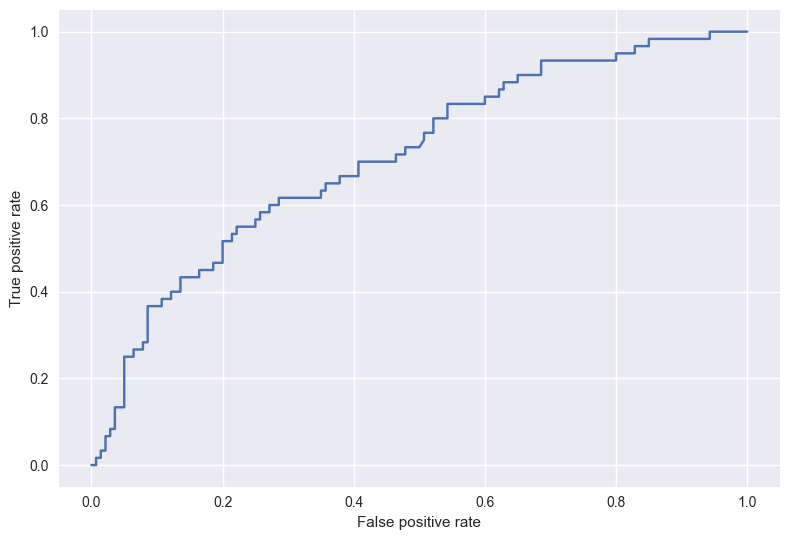

In [64]:
plt.plot(fpr, tpr)

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

plt.tight_layout()
plt.show()

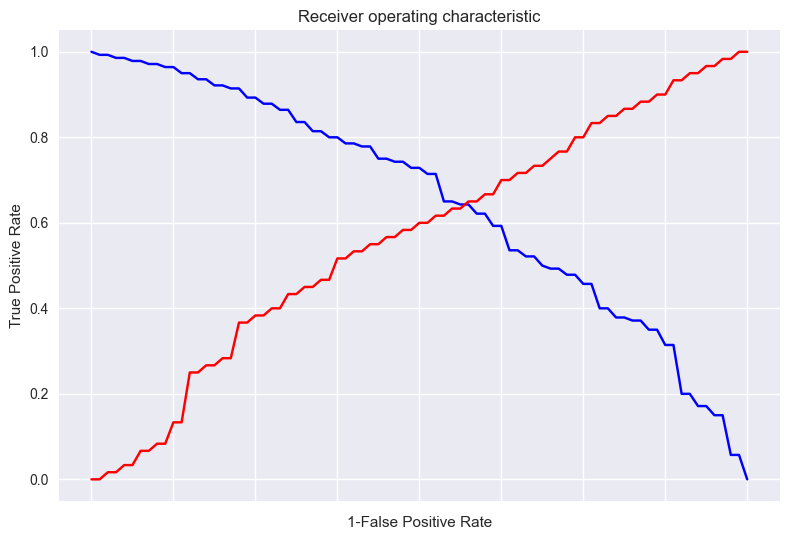

In [65]:
fig, ax = pl.subplots()
pl.plot(roc['1-fpr'], color = 'blue')
pl.plot(roc['tpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

plt.tight_layout()
plt.show()

In [66]:
roc_auc = auc(fpr, tpr)
print("Area under the curve : ", roc_auc)

Area under the curve :  0.7108928571428572


Area under the curve for test data is 71%

In [67]:
# creating a new column named pred, fitting it with pred value and adding it to the test data.
test["pred"] = test_pred
test

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,pred
40,-0.340772,1,3,0,1,1,0,3,2,1,...,5,-0.024117,3,1,0,0,0,3,0,0.388166
383,-0.894141,1,3,0,1,0,1,0,1,1,...,6,-0.765559,3,2,0,0,0,3,0,0.291025
986,0.000996,1,0,0,1,0,1,0,1,1,...,1,1.245290,1,0,0,0,1,4,0,0.685642
79,-1.605837,1,2,0,1,0,1,0,1,1,...,0,0.617235,1,0,0,0,0,3,0,0.554203
775,-1.054670,0,1,0,2,3,1,1,2,1,...,6,-0.725086,3,2,0,0,0,3,1,0.442745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,0.103852,1,3,1,1,0,3,1,2,1,...,0,0.242420,1,2,0,0,0,3,1,0.268910
183,1.269250,1,3,0,1,3,1,1,2,1,...,0,0.598725,3,2,0,0,0,1,0,0.221915
977,0.778217,1,3,0,1,1,1,3,2,1,...,1,0.027391,3,0,0,0,1,2,0,0.218547
224,-0.340772,1,3,0,1,1,1,1,2,1,...,8,0.865871,2,1,0,0,0,3,0,0.250903


In [68]:
# creating a new column name optimal thresholds and fitting optimal thresholds value in it.
test["optimal_thresholds"] = optimal_thresholds
test

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,pred,optimal_thresholds
40,-0.340772,1,3,0,1,1,0,3,2,1,...,-0.024117,3,1,0,0,0,3,0,0.388166,0.325516
383,-0.894141,1,3,0,1,0,1,0,1,1,...,-0.765559,3,2,0,0,0,3,0,0.291025,0.325516
986,0.000996,1,0,0,1,0,1,0,1,1,...,1.245290,1,0,0,0,1,4,0,0.685642,0.325516
79,-1.605837,1,2,0,1,0,1,0,1,1,...,0.617235,1,0,0,0,0,3,0,0.554203,0.325516
775,-1.054670,0,1,0,2,3,1,1,2,1,...,-0.725086,3,2,0,0,0,3,1,0.442745,0.325516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,0.103852,1,3,1,1,0,3,1,2,1,...,0.242420,1,2,0,0,0,3,1,0.268910,0.325516
183,1.269250,1,3,0,1,3,1,1,2,1,...,0.598725,3,2,0,0,0,1,0,0.221915,0.325516
977,0.778217,1,3,0,1,1,1,3,2,1,...,0.027391,3,0,0,0,1,2,0,0.218547,0.325516
224,-0.340772,1,3,0,1,1,1,1,2,1,...,0.865871,2,1,0,0,0,3,0,0.250903,0.325516


In [69]:
#creating a new columns and making all the values as zero 
test["pred_1"] = np.zeros(len(test))
test

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,pred,optimal_thresholds,pred_1
40,-0.340772,1,3,0,1,1,0,3,2,1,...,3,1,0,0,0,3,0,0.388166,0.325516,0.0
383,-0.894141,1,3,0,1,0,1,0,1,1,...,3,2,0,0,0,3,0,0.291025,0.325516,0.0
986,0.000996,1,0,0,1,0,1,0,1,1,...,1,0,0,0,1,4,0,0.685642,0.325516,0.0
79,-1.605837,1,2,0,1,0,1,0,1,1,...,1,0,0,0,0,3,0,0.554203,0.325516,0.0
775,-1.054670,0,1,0,2,3,1,1,2,1,...,3,2,0,0,0,3,1,0.442745,0.325516,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,0.103852,1,3,1,1,0,3,1,2,1,...,1,2,0,0,0,3,1,0.268910,0.325516,0.0
183,1.269250,1,3,0,1,3,1,1,2,1,...,3,2,0,0,0,1,0,0.221915,0.325516,0.0
977,0.778217,1,3,0,1,1,1,3,2,1,...,3,0,0,0,1,2,0,0.218547,0.325516,0.0
224,-0.340772,1,3,0,1,1,1,1,2,1,...,2,1,0,0,0,3,0,0.250903,0.325516,0.0


In [70]:
pred = pd.DataFrame({"pred":test_pred})
pred

,pred
40,0.388166
383,0.291025
986,0.685642
79,0.554203
775,0.442745
...,...
543,0.268910
183,0.221915
977,0.218547
224,0.250903


In [71]:
# fitting the pred column with 1 where it is pred value is greater than optimal threshold value
test.loc[pred["pred"] > optimal_thresholds, "pred_1"] = 1
test

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,pred,optimal_thresholds,pred_1
40,-0.340772,1,3,0,1,1,0,3,2,1,...,3,1,0,0,0,3,0,0.388166,0.325516,1.0
383,-0.894141,1,3,0,1,0,1,0,1,1,...,3,2,0,0,0,3,0,0.291025,0.325516,0.0
986,0.000996,1,0,0,1,0,1,0,1,1,...,1,0,0,0,1,4,0,0.685642,0.325516,1.0
79,-1.605837,1,2,0,1,0,1,0,1,1,...,1,0,0,0,0,3,0,0.554203,0.325516,1.0
775,-1.054670,0,1,0,2,3,1,1,2,1,...,3,2,0,0,0,3,1,0.442745,0.325516,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,0.103852,1,3,1,1,0,3,1,2,1,...,1,2,0,0,0,3,1,0.268910,0.325516,0.0
183,1.269250,1,3,0,1,3,1,1,2,1,...,3,2,0,0,0,1,0,0.221915,0.325516,0.0
977,0.778217,1,3,0,1,1,1,3,2,1,...,3,0,0,0,1,2,0,0.218547,0.325516,0.0
224,-0.340772,1,3,0,1,1,1,1,2,1,...,2,1,0,0,0,3,0,0.250903,0.325516,0.0


In [72]:
#Importing classification report
from sklearn.metrics import classification_report

print(classification_report(test["pred_1"], test[target]))

              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76       124
         1.0       0.60      0.47      0.53        76

    accuracy                           0.68       200
   macro avg       0.66      0.64      0.64       200
weighted avg       0.67      0.68      0.67       200



In [73]:
test["high_risk_applicant"] = np.where(test["high_risk_applicant"] == 0, "Low Risk", test["high_risk_applicant"])
test["high_risk_applicant"] = np.where(test["high_risk_applicant"] == "1", "High Risk", test["high_risk_applicant"])
test

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,pred,optimal_thresholds,pred_1
40,-0.340772,1,3,0,1,1,0,3,2,1,...,3,1,0,0,0,3,Low Risk,0.388166,0.325516,1.0
383,-0.894141,1,3,0,1,0,1,0,1,1,...,3,2,0,0,0,3,Low Risk,0.291025,0.325516,0.0
986,0.000996,1,0,0,1,0,1,0,1,1,...,1,0,0,0,1,4,Low Risk,0.685642,0.325516,1.0
79,-1.605837,1,2,0,1,0,1,0,1,1,...,1,0,0,0,0,3,Low Risk,0.554203,0.325516,1.0
775,-1.054670,0,1,0,2,3,1,1,2,1,...,3,2,0,0,0,3,High Risk,0.442745,0.325516,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,0.103852,1,3,1,1,0,3,1,2,1,...,1,2,0,0,0,3,High Risk,0.268910,0.325516,0.0
183,1.269250,1,3,0,1,3,1,1,2,1,...,3,2,0,0,0,1,Low Risk,0.221915,0.325516,0.0
977,0.778217,1,3,0,1,1,1,3,2,1,...,3,0,0,0,1,2,Low Risk,0.218547,0.325516,0.0
224,-0.340772,1,3,0,1,1,1,1,2,1,...,2,1,0,0,0,3,Low Risk,0.250903,0.325516,0.0


In [74]:
test["pred_1"] = np.where(test["pred_1"] == 0.0, "Low Risk", test["pred_1"])
test["pred_1"] = np.where(test["pred_1"] == "1.0", "High Risk", test["pred_1"])
test

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,pred,optimal_thresholds,pred_1
40,-0.340772,1,3,0,1,1,0,3,2,1,...,3,1,0,0,0,3,Low Risk,0.388166,0.325516,High Risk
383,-0.894141,1,3,0,1,0,1,0,1,1,...,3,2,0,0,0,3,Low Risk,0.291025,0.325516,Low Risk
986,0.000996,1,0,0,1,0,1,0,1,1,...,1,0,0,0,1,4,Low Risk,0.685642,0.325516,High Risk
79,-1.605837,1,2,0,1,0,1,0,1,1,...,1,0,0,0,0,3,Low Risk,0.554203,0.325516,High Risk
775,-1.054670,0,1,0,2,3,1,1,2,1,...,3,2,0,0,0,3,High Risk,0.442745,0.325516,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,0.103852,1,3,1,1,0,3,1,2,1,...,1,2,0,0,0,3,High Risk,0.268910,0.325516,Low Risk
183,1.269250,1,3,0,1,3,1,1,2,1,...,3,2,0,0,0,1,Low Risk,0.221915,0.325516,Low Risk
977,0.778217,1,3,0,1,1,1,3,2,1,...,3,0,0,0,1,2,Low Risk,0.218547,0.325516,Low Risk
224,-0.340772,1,3,0,1,1,1,1,2,1,...,2,1,0,0,0,3,Low Risk,0.250903,0.325516,Low Risk


In [75]:
print("For Test: ")
display(pd.crosstab(test[target], test["pred_1"], rownames = ["Actual"], colnames = ["Prediction"]))
print("Accuracy: ", accuracy_score(test[target], test["pred_1"]))

For Test: 


Prediction,High Risk,Low Risk
Actual,,
High Risk,36,24
Low Risk,40,100


Accuracy:  0.68


The model is giving 68% accuracy. Also, missclasiification is very less.

prediction on Train data

In [76]:
train_pred = model.predict(train[predictor])
train_pred

355    0.453861
661    0.276934
300    0.231776
916    0.185098
294    0.483045
         ...   
634    0.520457
778    0.322271
172    0.510869
739    0.530644
439    0.255266
Length: 800, dtype: float64

In [77]:
fpr, tpr, thresholds = roc_curve(train[target], train_pred)
display(fpr, tpr, thresholds)

array([0.        , 0.        , 0.00178571, 0.00178571, 0.00357143,
       0.00357143, 0.00535714, 0.00535714, 0.01071429, 0.01071429,
       0.01428571, 0.01428571, 0.01428571, 0.01428571, 0.02142857,
       0.02142857, 0.02321429, 0.02321429, 0.025     , 0.025     ,
       0.02857143, 0.03035714, 0.03035714, 0.03392857, 0.03392857,
       0.0375    , 0.0375    , 0.03928571, 0.04107143, 0.04107143,
       0.04464286, 0.04464286, 0.04642857, 0.04642857, 0.06428571,
       0.06607143, 0.06607143, 0.06785714, 0.06785714, 0.07142857,
       0.07142857, 0.075     , 0.075     , 0.08214286, 0.08214286,
       0.08571429, 0.08571429, 0.08571429, 0.08571429, 0.08928571,
       0.08928571, 0.09285714, 0.09285714, 0.09464286, 0.09464286,
       0.09642857, 0.09642857, 0.09821429, 0.09821429, 0.1       ,
       0.1       , 0.10535714, 0.10535714, 0.11071429, 0.11071429,
       0.1125    , 0.1125    , 0.11428571, 0.11428571, 0.11785714,
       0.12142857, 0.125     , 0.12857143, 0.12857143, 0.13392

array([0.        , 0.00416667, 0.00416667, 0.0125    , 0.0125    ,
       0.01666667, 0.01666667, 0.025     , 0.025     , 0.03333333,
       0.03333333, 0.06666667, 0.075     , 0.08333333, 0.08333333,
       0.0875    , 0.0875    , 0.1125    , 0.1125    , 0.12916667,
       0.12916667, 0.12916667, 0.1375    , 0.1375    , 0.15416667,
       0.15416667, 0.1625    , 0.16666667, 0.16666667, 0.175     ,
       0.175     , 0.17916667, 0.17916667, 0.1875    , 0.1875    ,
       0.19166667, 0.2       , 0.2       , 0.20833333, 0.20833333,
       0.2125    , 0.2125    , 0.225     , 0.225     , 0.22916667,
       0.22916667, 0.25416667, 0.2625    , 0.26666667, 0.26666667,
       0.27083333, 0.27083333, 0.27916667, 0.27916667, 0.2875    ,
       0.2875    , 0.29166667, 0.29166667, 0.29583333, 0.29583333,
       0.3       , 0.3       , 0.30416667, 0.30416667, 0.30833333,
       0.30833333, 0.3125    , 0.3125    , 0.32083333, 0.32083333,
       0.32083333, 0.32083333, 0.32083333, 0.325     , 0.325  

array([1.72060233, 0.72060233, 0.69074628, 0.67999304, 0.65489652,
       0.63901816, 0.62938519, 0.6163607 , 0.60273003, 0.59599998,
       0.58508817, 0.55377269, 0.5467583 , 0.54228466, 0.53621385,
       0.53438377, 0.534222  , 0.52644954, 0.52576114, 0.51822926,
       0.51722733, 0.51414024, 0.51086935, 0.5106783 , 0.50820171,
       0.50530687, 0.50017034, 0.49921429, 0.49733065, 0.4957299 ,
       0.49459876, 0.49448256, 0.49234212, 0.48961094, 0.48158458,
       0.48155402, 0.47837131, 0.47653915, 0.47221414, 0.47168613,
       0.47099441, 0.46907533, 0.46830135, 0.46490566, 0.46418411,
       0.46047122, 0.45386141, 0.45192307, 0.4517084 , 0.4510207 ,
       0.44969149, 0.44932824, 0.44815393, 0.44815171, 0.44692448,
       0.44671258, 0.44536819, 0.44360134, 0.44312273, 0.44228155,
       0.44146116, 0.43882977, 0.43848714, 0.43382615, 0.43298558,
       0.43260307, 0.43150532, 0.43082126, 0.42819347, 0.42783819,
       0.42579884, 0.42519783, 0.42443496, 0.42291053, 0.42031

In [78]:
optimal_idx = np.argmax(tpr - fpr)
optimal_idx

109

In [79]:
optimal_thresholds = thresholds[optimal_idx]
optimal_thresholds

0.36537839244101483

Optimal threshold value for train data is 0.3653

In [80]:
import pylab as pl

i = np.arange(len(tpr))
roc = pd.DataFrame({"fpr":pd.Series(fpr, index = i), "tpr":pd.Series(tpr, index = i), "1-fpr":pd.Series(1-fpr, index = i), "tf":pd.Series(tpr - (1 - fpr), index = i), "thresholds":pd.Series(thresholds, index = i)})
roc

,fpr,tpr,1-fpr,tf,thresholds
0,0.000000,0.000000,1.000000,-1.000000,1.720602
1,0.000000,0.004167,1.000000,-0.995833,0.720602
2,0.001786,0.004167,0.998214,-0.994048,0.690746
3,0.001786,0.012500,0.998214,-0.985714,0.679993
4,0.003571,0.012500,0.996429,-0.983929,0.654897
...,...,...,...,...,...
327,0.975000,0.995833,0.025000,0.970833,0.093156
328,0.978571,0.995833,0.021429,0.974405,0.089076
329,0.978571,1.000000,0.021429,0.978571,0.088773
330,0.996429,1.000000,0.003571,0.996429,0.063613


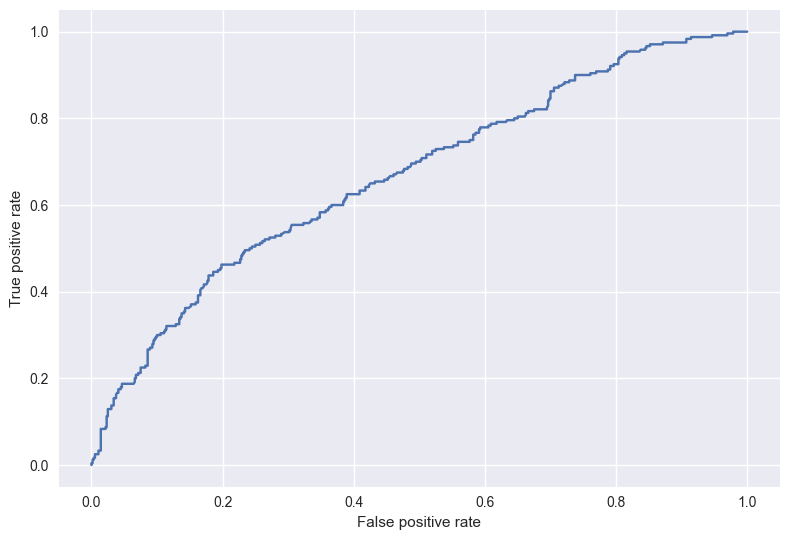

In [81]:
#Plotting graph
plt.plot(fpr, tpr)

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

plt.tight_layout()
plt.show()

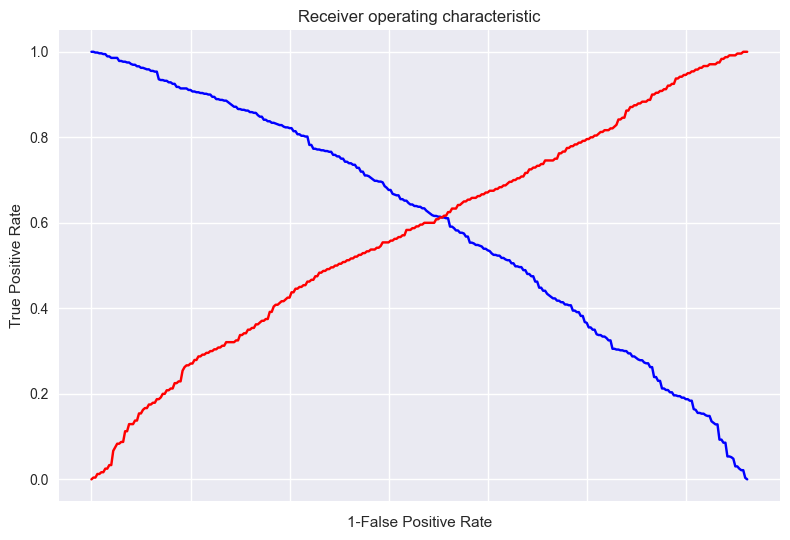

In [82]:
fig, ax = pl.subplots()
pl.plot(roc['1-fpr'], color = 'blue')
pl.plot(roc['tpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

plt.tight_layout()
plt.show()

In [83]:
roc_auc = auc(fpr, tpr)
print("Area under the curve : ", roc_auc)

Area under the curve :  0.6670982142857143


Area under the curve is 66%

In [84]:
#adding columns in train datasets
train["pred"] = train_pred
train

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,pred
355,-1.409225,1,3,0,1,1,3,0,1,1,...,6,-0.852690,3,2,0,0,0,3,1,0.453861
661,-1.409225,1,2,0,1,1,1,1,2,1,...,6,-1.290455,3,1,0,0,0,3,1,0.276934
300,1.468842,0,1,0,1,3,2,1,0,1,...,6,-1.688345,0,2,0,0,0,3,0,0.231776
916,-0.107093,1,3,1,1,1,1,1,2,1,...,8,0.235167,0,2,1,0,0,3,0,0.185098
294,1.041367,1,0,1,1,1,0,3,2,1,...,1,1.486896,3,1,0,0,1,1,0,0.483045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,-1.054670,0,1,0,1,3,3,0,1,1,...,6,-0.740729,2,1,0,0,0,3,1,0.520457
778,0.470226,1,3,0,1,1,0,3,2,1,...,8,1.124018,3,1,0,0,1,1,0,0.322271
172,0.103852,0,1,0,1,1,0,1,0,1,...,0,-0.184369,2,0,0,0,0,2,1,0.510869
739,-0.894141,0,1,0,2,3,3,1,2,1,...,1,0.758456,3,1,0,0,1,4,1,0.530644


In [85]:
train["optimal_thresholds"] = optimal_thresholds
train

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,pred,optimal_thresholds
355,-1.409225,1,3,0,1,1,3,0,1,1,...,-0.852690,3,2,0,0,0,3,1,0.453861,0.365378
661,-1.409225,1,2,0,1,1,1,1,2,1,...,-1.290455,3,1,0,0,0,3,1,0.276934,0.365378
300,1.468842,0,1,0,1,3,2,1,0,1,...,-1.688345,0,2,0,0,0,3,0,0.231776,0.365378
916,-0.107093,1,3,1,1,1,1,1,2,1,...,0.235167,0,2,1,0,0,3,0,0.185098,0.365378
294,1.041367,1,0,1,1,1,0,3,2,1,...,1.486896,3,1,0,0,1,1,0,0.483045,0.365378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,-1.054670,0,1,0,1,3,3,0,1,1,...,-0.740729,2,1,0,0,0,3,1,0.520457,0.365378
778,0.470226,1,3,0,1,1,0,3,2,1,...,1.124018,3,1,0,0,1,1,0,0.322271,0.365378
172,0.103852,0,1,0,1,1,0,1,0,1,...,-0.184369,2,0,0,0,0,2,1,0.510869,0.365378
739,-0.894141,0,1,0,2,3,3,1,2,1,...,0.758456,3,1,0,0,1,4,1,0.530644,0.365378


In [86]:
train["pred_1"] = np.zeros(len(train))
train

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,pred,optimal_thresholds,pred_1
355,-1.409225,1,3,0,1,1,3,0,1,1,...,3,2,0,0,0,3,1,0.453861,0.365378,0.0
661,-1.409225,1,2,0,1,1,1,1,2,1,...,3,1,0,0,0,3,1,0.276934,0.365378,0.0
300,1.468842,0,1,0,1,3,2,1,0,1,...,0,2,0,0,0,3,0,0.231776,0.365378,0.0
916,-0.107093,1,3,1,1,1,1,1,2,1,...,0,2,1,0,0,3,0,0.185098,0.365378,0.0
294,1.041367,1,0,1,1,1,0,3,2,1,...,3,1,0,0,1,1,0,0.483045,0.365378,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,-1.054670,0,1,0,1,3,3,0,1,1,...,2,1,0,0,0,3,1,0.520457,0.365378,0.0
778,0.470226,1,3,0,1,1,0,3,2,1,...,3,1,0,0,1,1,0,0.322271,0.365378,0.0
172,0.103852,0,1,0,1,1,0,1,0,1,...,2,0,0,0,0,2,1,0.510869,0.365378,0.0
739,-0.894141,0,1,0,2,3,3,1,2,1,...,3,1,0,0,1,4,1,0.530644,0.365378,0.0


In [87]:
pred = pd.DataFrame({"pred":train_pred})
pred

,pred
355,0.453861
661,0.276934
300,0.231776
916,0.185098
294,0.483045
...,...
634,0.520457
778,0.322271
172,0.510869
739,0.530644


In [88]:
train.loc[pred["pred"] > optimal_thresholds, "pred_1"] = 1
train

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,pred,optimal_thresholds,pred_1
355,-1.409225,1,3,0,1,1,3,0,1,1,...,3,2,0,0,0,3,1,0.453861,0.365378,1.0
661,-1.409225,1,2,0,1,1,1,1,2,1,...,3,1,0,0,0,3,1,0.276934,0.365378,0.0
300,1.468842,0,1,0,1,3,2,1,0,1,...,0,2,0,0,0,3,0,0.231776,0.365378,0.0
916,-0.107093,1,3,1,1,1,1,1,2,1,...,0,2,1,0,0,3,0,0.185098,0.365378,0.0
294,1.041367,1,0,1,1,1,0,3,2,1,...,3,1,0,0,1,1,0,0.483045,0.365378,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,-1.054670,0,1,0,1,3,3,0,1,1,...,2,1,0,0,0,3,1,0.520457,0.365378,1.0
778,0.470226,1,3,0,1,1,0,3,2,1,...,3,1,0,0,1,1,0,0.322271,0.365378,0.0
172,0.103852,0,1,0,1,1,0,1,0,1,...,2,0,0,0,0,2,1,0.510869,0.365378,1.0
739,-0.894141,0,1,0,2,3,3,1,2,1,...,3,1,0,0,1,4,1,0.530644,0.365378,1.0


In [89]:
from sklearn.metrics import classification_report

print(classification_report(train["pred_1"], train[target]))

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       579
         1.0       0.46      0.50      0.48       221

    accuracy                           0.70       800
   macro avg       0.63      0.64      0.63       800
weighted avg       0.71      0.70      0.70       800



In [90]:
train["high_risk_applicant"] = np.where(train["high_risk_applicant"] == 0, "Low Risk", train["high_risk_applicant"])
train["high_risk_applicant"] = np.where(train["high_risk_applicant"] == "1", "High Risk", train["high_risk_applicant"])
train

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,pred,optimal_thresholds,pred_1
355,-1.409225,1,3,0,1,1,3,0,1,1,...,3,2,0,0,0,3,High Risk,0.453861,0.365378,1.0
661,-1.409225,1,2,0,1,1,1,1,2,1,...,3,1,0,0,0,3,High Risk,0.276934,0.365378,0.0
300,1.468842,0,1,0,1,3,2,1,0,1,...,0,2,0,0,0,3,Low Risk,0.231776,0.365378,0.0
916,-0.107093,1,3,1,1,1,1,1,2,1,...,0,2,1,0,0,3,Low Risk,0.185098,0.365378,0.0
294,1.041367,1,0,1,1,1,0,3,2,1,...,3,1,0,0,1,1,Low Risk,0.483045,0.365378,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,-1.054670,0,1,0,1,3,3,0,1,1,...,2,1,0,0,0,3,High Risk,0.520457,0.365378,1.0
778,0.470226,1,3,0,1,1,0,3,2,1,...,3,1,0,0,1,1,Low Risk,0.322271,0.365378,0.0
172,0.103852,0,1,0,1,1,0,1,0,1,...,2,0,0,0,0,2,High Risk,0.510869,0.365378,1.0
739,-0.894141,0,1,0,2,3,3,1,2,1,...,3,1,0,0,1,4,High Risk,0.530644,0.365378,1.0


In [91]:
train["pred_1"] = np.where(train["pred_1"] == 0.0, "Low Risk", train["pred_1"])
train["pred_1"] = np.where(train["pred_1"] == "1.0", "High Risk", train["pred_1"])
train

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,pred,optimal_thresholds,pred_1
355,-1.409225,1,3,0,1,1,3,0,1,1,...,3,2,0,0,0,3,High Risk,0.453861,0.365378,High Risk
661,-1.409225,1,2,0,1,1,1,1,2,1,...,3,1,0,0,0,3,High Risk,0.276934,0.365378,Low Risk
300,1.468842,0,1,0,1,3,2,1,0,1,...,0,2,0,0,0,3,Low Risk,0.231776,0.365378,Low Risk
916,-0.107093,1,3,1,1,1,1,1,2,1,...,0,2,1,0,0,3,Low Risk,0.185098,0.365378,Low Risk
294,1.041367,1,0,1,1,1,0,3,2,1,...,3,1,0,0,1,1,Low Risk,0.483045,0.365378,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,-1.054670,0,1,0,1,3,3,0,1,1,...,2,1,0,0,0,3,High Risk,0.520457,0.365378,High Risk
778,0.470226,1,3,0,1,1,0,3,2,1,...,3,1,0,0,1,1,Low Risk,0.322271,0.365378,Low Risk
172,0.103852,0,1,0,1,1,0,1,0,1,...,2,0,0,0,0,2,High Risk,0.510869,0.365378,High Risk
739,-0.894141,0,1,0,2,3,3,1,2,1,...,3,1,0,0,1,4,High Risk,0.530644,0.365378,High Risk


In [92]:
print("For Test: ")
display(pd.crosstab(test[target], test["pred_1"], rownames = ["Actual"], colnames = ["Prediction"]))
print("Accuracy: ", accuracy_score(test[target], test["pred_1"]))

print(".............................................")

print("For Train: ")
display(pd.crosstab(train[target], train["pred_1"], rownames = ["Actual"], colnames = ["Prediction"]))
print("Accuracy: ", accuracy_score(train[target], train["pred_1"]))

For Test: 


Prediction,High Risk,Low Risk
Actual,,
High Risk,36,24
Low Risk,40,100


Accuracy:  0.68
.............................................
For Train: 


Prediction,High Risk,Low Risk
Actual,,
High Risk,110,130
Low Risk,111,449


Accuracy:  0.69875


- For test data it is giving 68% accuracy.
- For train data it is giving 69% accuracy.

In [93]:
from sklearn.metrics import classification_report
print("For Test: ")
print(classification_report(test["pred_1"], test[target]))

print("..............................................................................")
print("..............................................................................")

print("For Train: ")
print(classification_report(train["pred_1"], train[target]))

For Test: 
              precision    recall  f1-score   support

   High Risk       0.60      0.47      0.53        76
    Low Risk       0.71      0.81      0.76       124

    accuracy                           0.68       200
   macro avg       0.66      0.64      0.64       200
weighted avg       0.67      0.68      0.67       200

..............................................................................
..............................................................................
For Train: 
              precision    recall  f1-score   support

   High Risk       0.46      0.50      0.48       221
    Low Risk       0.80      0.78      0.79       579

    accuracy                           0.70       800
   macro avg       0.63      0.64      0.63       800
weighted avg       0.71      0.70      0.70       800



Conclusion :- 

- Very less row of data is present for predicting. that's why output accuracy is not too good.
- For this business objective, we have to go with explainable ML algorithms.


- After trying various ML algorithm, we find out that every accuracy is giving around 70% accuracy. But, only logistic regression using stats model is giving good output in confusion matrix. Misclassification is very less in logistic. The applicants who are High risk but the model is predicting as low risk are very less.

So, we can go with Logistic Regression model for model building.

### For Deployment

After selecting the best ML algorithm, we go for deployment. For deployment
-  we have to build a webframework which we can build using Flask, Streamlit or there are various python libraries which will help. 
- After building webframe we have to upload all the required file like Procfile, setup.sh , alongwith all the files we build for webframework on GitHub or any reprository available.
- After that, open any cloud platform and connect that with reprository and click on deploy. Model will get deployed and will give the link website link which can be access by anyone around the globe.